# Tips for using colab Environment


## Click the following URL to load this notebook on Colab environment

* https://colab.research.google.com/github/ch6845/dynamic-cell-classifier/blob/master/3_DCC.ipynb

* You can use free GPUs from Google on Colab. (For more information, see https://colab.research.google.com/notebooks/welcome.ipynb)

## Enabling and testing the GPU
* Navigate to Edit→Notebook Settings
* select GPU from the Hardware Accelerator drop-down

## Load data
* Upload your data or, mount a storage to Colab virtual environment.
(For more information, see https://colab.research.google.com/notebooks/io.ipynb)

In [2]:
import datetime

import numpy as np
import pandas as pd

from scipy.io import mmread

import matplotlib.pyplot as plt

In [3]:
import os
os.__file__

'/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/os.py'

# load data

## expression data

In [4]:
exp_data=mmread('data/HumanLiver_extract/HumanLiver.data.counts.mm').toarray().astype(float)
with open('data/HumanLiver_extract/HumanLiver.data.col','r') as f: exp_data_col=[i.strip().strip('"') for i in f.read().split()]
with open('data/HumanLiver_extract/HumanLiver.data.row','r') as f: exp_data_row=[i.strip().strip('"') for i in f.read().split()]
assert exp_data.shape==(len(exp_data_row),len(exp_data_col))

In [5]:
assert len(set(exp_data_row))==len(exp_data_row)
assert len(set(exp_data_col))==len(exp_data_col)

In [6]:
exp_data,exp_data.shape

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), (20007, 8444))

In [7]:
exp_data_row[:5],exp_data_col[:5]

(['RP11-34P13.7', 'FO538757.2', 'AP006222.2', 'RP4-669L17.10', 'RP5-857K21.4'],
 ['P1TLH_AAACCTGAGCAGCCTC_1',
  'P1TLH_AAACCTGTCCTCATTA_1',
  'P1TLH_AAACCTGTCTAAGCCA_1',
  'P1TLH_AAACGGGAGTAGGCCA_1',
  'P1TLH_AAACGGGGTTCGGGCT_1'])

## cluster info 

In [8]:
exp_data_meta=pd.read_csv('data/HumanLiver_extract/HumanLiver.metadata.tsv',sep='\t')
exp_data_meta.head()

,total_counts,total_features,orig.ident,res.0.8,S.Score,G2M.Score,Phase,tSNE_1,tSNE_2
P1TLH_AAACCTGAGCAGCCTC_1,2943,1427,P1TLH,12,0.046089,0.000349,S,12.331038,4.044869
P1TLH_AAACCTGTCCTCATTA_1,10897,2522,P1TLH,17,-0.000357,0.009434,G2M,-10.186342,-50.465799
P1TLH_AAACCTGTCTAAGCCA_1,1914,1018,P1TLH,12,0.012811,-0.056561,S,15.618844,6.213892
P1TLH_AAACGGGAGTAGGCCA_1,5574,1798,P1TLH,10,-0.011324,-0.047102,G1,4.710776,10.386157
P1TLH_AAACGGGGTTCGGGCT_1,3700,1417,P1TLH,2,0.057467,-0.003861,S,-14.954216,19.197842


`clusterid_to_clustername` is used to convert integers in `res.0.8` to cell-type name

In [9]:
clusterid_to_clustername=pd.read_csv('data/HumanLiver_extract/HumanLiver.clusterid_to_clustername.tsv',sep='\t',header=None,index_col=0)
clusterid_to_clustername[1]=clusterid_to_clustername[1].str.replace(' ','_')
len(clusterid_to_clustername[1].unique()),

(11,)

# Panglao

In [10]:
markers_db=pd.read_csv("data/PanglaoDB_markers_27_Mar_2020.tsv.gz",sep='\t')
markers_db=markers_db[markers_db['species'].str.contains('Hs')].drop(columns='species')
markers_db.head()

,official gene symbol,cell type,nicknames,ubiquitousness index,product description,gene type,canonical marker,germ layer,organ,sensitivity_human,sensitivity_mouse,specificity_human,specificity_mouse
0,CTRB1,Acinar cells,CTRB,0.017,chymotrypsinogen B1,protein-coding gene,1.0,Endoderm,Pancreas,1.000000,0.957143,0.000629,0.015920
1,KLK1,Acinar cells,Klk6,0.013,kallikrein 1,protein-coding gene,1.0,Endoderm,Pancreas,0.833333,0.314286,0.005031,0.012826
2,RBPJL,Acinar cells,RBP-L|SUHL|RBPSUHL,0.001,recombination signal binding protein for immun...,protein-coding gene,1.0,Endoderm,Pancreas,0.000000,0.000000,0.000000,0.000000
3,PTF1A,Acinar cells,PTF1-p48|bHLHa29,0.001,pancreas associated transcription factor 1a,protein-coding gene,1.0,Endoderm,Pancreas,0.000000,0.157143,0.000629,0.000773
5,CELA3A,Acinar cells,ELA3|ELA3A,0.001,chymotrypsin like elastase family member 3A,protein-coding gene,1.0,Endoderm,Pancreas,0.833333,0.128571,0.000000,0.000000


In [11]:
#markers_db[(markers_db['official gene symbol']=='FXDY2') |(markers_db['nicknames'].str.contains('FXDY2'))],'FXDY2' in exp_data_row

## Marker info

In [12]:
# New one

clustername_to_markers={'Cholangiocytes':['KRT19','EPCAM','FXYD2','CLDN4','CLDN10','SOX9','MMP7','CXCL1','CFTR','TFF2','KRT7','CD24'],
'Mature_B_cells':['MS4A1','IGHD','CD79A','PTPRC','IGKC','CD19'],
'Hepatocytes':['ALB','HAMP','ARG1','PCK1','AFP','BCHE'],
'LSECs':['CALCRL','VWF','PECAM1','CLEC14A','EMCN'],
'Hepatic_Stellate_Cells':['ACTA2','COL1A1','TAGLN','COL1A2','COL3A1','SPARC','RBP1','DCN','MYL9'],
'Macrophages':['CD68','MARCO','FCGR3A','LYZ','PTPRC','AIF1'],
'ab_T_cells':['CD2','CD3D','TRAC','IL32','CD3E','PTPRC'],
'gd_T_cells':['NKG7','FCGR3A','HOPX','GNLY','CMC1','KLRF1','CCL3','PTPRC'],
'NK_cells':['GZMK','KLRF1','CCL3','CMC1','NKG7','PTPRC'],
'Plasma_cells':['CD27','IGHG1','IGHA1','IGHM','CD79A','PTPRC','IGKC'],
'Erythroid_cells':['HBB','SLC25A37','CA1','ALAS2'],
'other':[]                           
}




# Old one
"""
clustername_to_markers={'Hepatocytes':['ALB','HAMP','ARG1','PCK1','AFP','BCHE'],
'LSECs':['CALCRL','FCGR2B','VWF'],
'Cholangiocytes':['KRT19','EPCAM','FXYD2','CLDN4','CLDN10','SOX9','MMP7','CXCL1','CFTR','TFF2','KRT7','CD24'],
'Hepatic_Stellate_Cells':['ACTA2','COL1A1','TAGLN','COL1A2','COL3A1','SPARC','RBP1','DCN','MYL9'],
'Macrophages':['CD68','MARCO'],
'ab_T_cells':['CD2','CD3D','TRAC','IL32','CD3E'],
'gd_T_cells':['NKG7','FCGR3A','HOPX','GNLY'],
'NK_cells':['GZMK','KLRF1','CCL3','CMC1'],
'Plasma_cells':['CD27','IGHG1'],
'Mature_B_cells':['MS4A1','LTB','CD52','IGHD'],
'Erythroid_cells':['HBB','SLC25A37','CA1','ALAS2'],
'other':[]    
}
"""

#for key,value in clustername2markers_new.items():
#    for i in value:
#        print(markers_db[(markers_db['official gene symbol']==i)].shape)
#markers_db[(markers_db['official gene symbol']=='CD32B') |(markers_db['nicknames'].str.contains('CD32B'))]
#clustername_to_markers

"\nclustername_to_markers={'Hepatocytes':['ALB','HAMP','ARG1','PCK1','AFP','BCHE'],\n'LSECs':['CALCRL','FCGR2B','VWF'],\n'Cholangiocytes':['KRT19','EPCAM','FXYD2','CLDN4','CLDN10','SOX9','MMP7','CXCL1','CFTR','TFF2','KRT7','CD24'],\n'Hepatic_Stellate_Cells':['ACTA2','COL1A1','TAGLN','COL1A2','COL3A1','SPARC','RBP1','DCN','MYL9'],\n'Macrophages':['CD68','MARCO'],\n'ab_T_cells':['CD2','CD3D','TRAC','IL32','CD3E'],\n'gd_T_cells':['NKG7','FCGR3A','HOPX','GNLY'],\n'NK_cells':['GZMK','KLRF1','CCL3','CMC1'],\n'Plasma_cells':['CD27','IGHG1'],\n'Mature_B_cells':['MS4A1','LTB','CD52','IGHD'],\n'Erythroid_cells':['HBB','SLC25A37','CA1','ALAS2'],\n'other':[]    \n}\n"

In [13]:
clustername_unique=list(clustername_to_markers.keys())
exp_data_meta_clusterid_clusteridunique=clusterid_to_clustername.loc[exp_data_meta['res.0.8'].values][1].apply(lambda x: clustername_unique.index(x))

In [14]:
marker_unique=np.unique([j for i in list(clustername_to_markers.values()) for j in i])
marker_unique_exp_data_idx=[exp_data_row.index(marker) for marker in marker_unique]
marker_unique,len(marker_unique)

(array(['ACTA2', 'AFP', 'AIF1', 'ALAS2', 'ALB', 'ARG1', 'BCHE', 'CA1',
        'CALCRL', 'CCL3', 'CD19', 'CD2', 'CD24', 'CD27', 'CD3D', 'CD3E',
        'CD68', 'CD79A', 'CFTR', 'CLDN10', 'CLDN4', 'CLEC14A', 'CMC1',
        'COL1A1', 'COL1A2', 'COL3A1', 'CXCL1', 'DCN', 'EMCN', 'EPCAM',
        'FCGR3A', 'FXYD2', 'GNLY', 'GZMK', 'HAMP', 'HBB', 'HOPX', 'IGHA1',
        'IGHD', 'IGHG1', 'IGHM', 'IGKC', 'IL32', 'KLRF1', 'KRT19', 'KRT7',
        'LYZ', 'MARCO', 'MMP7', 'MS4A1', 'MYL9', 'NKG7', 'PCK1', 'PECAM1',
        'PTPRC', 'RBP1', 'SLC25A37', 'SOX9', 'SPARC', 'TAGLN', 'TFF2',
        'TRAC', 'VWF'], dtype='<U8'), 63)

In [15]:
pi_true=np.array([np.sum(exp_data_meta_clusterid_clusteridunique==i) for i in sorted(np.unique(exp_data_meta_clusterid_clusteridunique))])/exp_data_meta_clusterid_clusteridunique.shape[0]
M_true=np.array([np.mean(exp_data[marker_unique_exp_data_idx,:][:,exp_data_meta_clusterid_clusteridunique==i],axis=1) for i in sorted(np.unique(exp_data_meta_clusterid_clusteridunique))])

In [16]:
cell_size_factor=pd.read_csv('data/analysis/size_factor_cluster.tsv',sep='\t',header=None)[0].values.astype(float)#.reshape(-1,1)
#cell_size_factor=np.ones_like(cell_size_factor)
cell_size_factor.shape

(8444,)

In [17]:
Y=exp_data[marker_unique_exp_data_idx].transpose().astype(float)
Y.shape

(8444, 63)

In [18]:
marker_onehot=np.array([np.sum(np.eye(len(marker_unique))[[marker_unique.tolist().index(marker) for marker in value]],axis=0) for key,value in clustername_to_markers.items()])
marker_onehot.shape
#marker_onehot.T

(12, 63)

In [19]:
exp_data_col_patient=pd.Series(exp_data_col).str.slice(start=1,stop=2).astype(int).values
x_data_covariate=np.eye(len(np.unique(exp_data_col_patient)))[exp_data_col_patient-1]
x_data_intercept=np.array([np.ones(Y.shape[0])]).transpose()
x_data_null=np.concatenate([x_data_intercept,x_data_covariate[:,:]],axis=1)
x_data_null.shape

(8444, 6)

/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


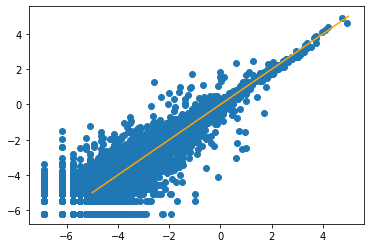

In [20]:

plt.scatter(np.log(exp_data[:,(exp_data_meta_clusterid_clusteridunique==clustername_unique.index('ab_T_cells')).values].mean(axis=1)),
np.log(exp_data[:,(exp_data_meta_clusterid_clusteridunique==clustername_unique.index('NK_cells')).values].mean(axis=1)))
plt.plot([-5, 5], [-5,5],color='orange')

/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


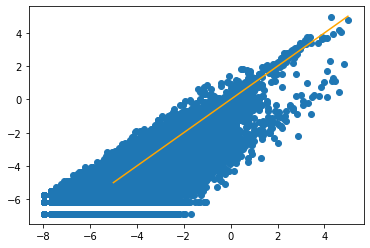

In [43]:
plt.scatter(np.log(exp_data[:,:].mean(axis=1)),
np.log(exp_data[:,(exp_data_meta_clusterid_clusteridunique==clustername_unique.index('ab_T_cells')).values].mean(axis=1)))
plt.plot([-5, 5], [-5,5],color='orange')

/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


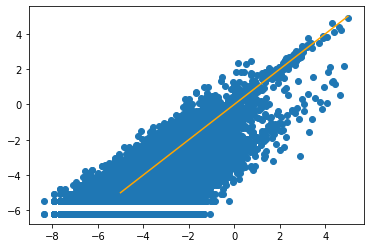

In [44]:
plt.scatter(np.log(exp_data[:,:].mean(axis=1)),
np.log(exp_data[:,(exp_data_meta_clusterid_clusteridunique==clustername_unique.index('NK_cells')).values].mean(axis=1)))
plt.plot([-5, 5], [-5,5],color='orange')

/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


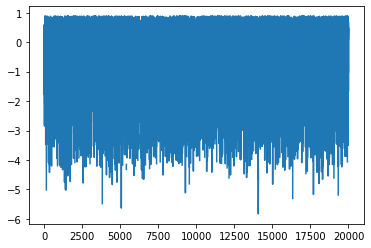

In [58]:
plt.plot(np.log(exp_data[:,(exp_data_meta_clusterid_clusteridunique==clustername_unique.index('Hepatocytes')).values].mean(axis=1))-np.log(exp_data[:,:].mean(axis=1)),
        )
#plt.plot([-5, 5], [-5,5],color='orange')

In [60]:

#[1 if m in ['ALB', 'HAMP', 'ARG1', 'PCK1', 'AFP', 'BCHE'] else 0 for m in exp_data_row]
(np.log(exp_data[:,(exp_data_meta_clusterid_clusteridunique==clustername_unique.index('Hepatocytes')).values].mean(axis=1))-np.log(exp_data[:,:].mean(axis=1)))[list(map(lambda x: exp_data_row.index(x),clustername_to_markers['Hepatocytes']))]

/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


array([0.83800501, 0.85593122, 0.84098807, 0.84708924, 0.85586119,
       0.85592699])

In [62]:
pd.Series(np.log(exp_data[:,(exp_data_meta_clusterid_clusteridunique==clustername_unique.index('Hepatocytes')).values].mean(axis=1))-np.log(exp_data[:,:].mean(axis=1))).sort_values()

/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


10003        -inf
13347        -inf
13346        -inf
13339        -inf
3160         -inf
           ...   
17686    0.880407
5546     0.880407
16075    0.880407
4831     0.880407
851      0.880407
Length: 20007, dtype: float64

# Torch porting

In [21]:
# Asuume that the following variables are initialized

# Input
Y
s=cell_size_factor
#X=x_data_null.copy()[:,[0, 1,2,3,4]]
#X=x_data_null.copy()[:,[0, 1,2]]
#X=x_data_null.copy()[:,[0,1,2,3]]
X=x_data_null.copy()[:,[0,1,2]]
# 234 x
# 34 x
# 123 x
rho=marker_onehot

delta_min=2
B=10
LR=1e-1

# Optional
EM_ITER_MAX=20
M_ITER_MAX=10000

BATCH_SIZE=Y.shape[0]
NUM_WORKERS=0

LOWER_BOUND=1e-10
THETA_LOWER_BOUND=1e-20


Q_diff_tolerance=1e-4
LL_diff_tolerance=1e-4
X.shape

(8444, 3)

In [22]:
import math
import numpy as np

import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
from torch.nn.parameter import Parameter

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [23]:
torch.set_default_dtype(torch.float64) 

In [24]:
device_cpu=torch.device("cpu")
device_cuda_list=[torch.device("cuda:{}".format(i)) for i in range(6)][::-1]

In [25]:
#from basic_tools import Cell_Dataset,Masked
class Masked_Function(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input, mask):
        #print('aaaa')
        output=input
        ctx.save_for_backward(input, mask)
        return output

    @staticmethod
    def backward(ctx, grad_output):
        input, mask = ctx.saved_tensors
        grad_input = grad_mask = None
        if ctx.needs_input_grad[0]:
            grad_input = grad_output.mul(mask)

        return grad_input, grad_mask
    
class Masked(nn.Module):    
    def __init__(self, mask):    
        super(Masked, self).__init__()
        
        self.mask = nn.Parameter(torch.Tensor(mask)==1, requires_grad=False)    
        
        
    def forward(self, input):
        return Masked_Function.apply(input, self.mask)

    def extra_repr(self):
        return 'mask={}'.format(self.mask.shape)  

In [26]:
import math
class NB_logprob(nn.Module):
    def __init__(self):
        super(NB_logprob,self).__init__()
        
    def forward(self,total_count,probs,value):
        
        #eps = torch.finfo(probs.dtype).eps
        #probs_clamped=probs.clamp(min=eps, max=1 - eps)        
        probs_clamped=probs
        logits=torch.log(probs_clamped) - torch.log1p(-probs_clamped)
        #logits=torch.log(probs_clamped)
        
        log_unnormalized_prob = (total_count * F.logsigmoid(-logits) +
                                 value * F.logsigmoid(logits))
        log_normalization = (-torch.lgamma(total_count + value) + torch.lgamma(1. + value) +
                             torch.lgamma(total_count))

        return log_unnormalized_prob - log_normalization
    
class Normal_logprob(nn.Module):
    def __init__(self):
        super(Normal_logprob,self).__init__()
        
    def forward(self,loc,scale,value):
    
        var = (scale ** 2)
        log_scale = torch.log(scale)
        
        
        #print(loc.shape,scale.shape,value.shape)
        return -((value - loc) ** 2) / (2 * var) - log_scale - math.log(math.sqrt(2 * math.pi))    
        #return log_scale
        
class Poisson_logprob(nn.Module):
    def __init__(self):
        super(Poisson_logprob,self).__init__()
        
    def forward(self,rate,value):
        #rate=rate.clamp(min=1e-3)+(-1)/rate.clamp(max=-1e-5)
        
        return (rate.log() * value) - rate - (value + 1).lgamma()
    
class Dirichlet_logprob(nn.Module):
    def __init__(self):
        super(Dirichlet_logprob,self).__init__()
        
    def forward(self,concentration,value):
        
        return ((torch.log(value) * (concentration - 1.0)).sum(-1) +
                torch.lgamma(concentration.sum(-1)) -
                torch.lgamma(concentration).sum(-1))
    
        
NB_logprob=NB_logprob()        
normal_logprob=Normal_logprob()
poisson_logprob=Poisson_logprob()
dirichlet_logprob=Dirichlet_logprob()

In [27]:
class Cell_Dataset(Dataset):
    def __init__(self,Y,X,s):
        self.Y=Y
        self.X=X
        self.s=s
        
    def __len__(self):
        return self.Y.shape[0]
    
    def __getitem__(self,idx):
        item= {"Y":self.Y[idx,:],"X":self.X[idx,:],"s":self.s[idx]}
        return item  

In [28]:
def run_EM(model,optimizer):
    global gamma_new,Q_new,LL_new
    
    print('Start time:',datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
    
    with torch.no_grad():
        for batch_idx,batch in enumerate(cell_dataloader):
            batch_Y=batch['Y'].to(device)
            batch_X=batch['X'].to(device)
            batch_s=batch['s'].to(device)    
        gamma_fixed,_,LL_old=model(batch_Y,batch_X,batch_s,gamma_fixed=None,mode='LL')
        _,Q_old,_=model(batch_Y,batch_X,batch_s,gamma_fixed=gamma_fixed,mode='M')

    print(LL_old)
    print(Q_old)

    for em_idx in range(EM_ITER_MAX):#
        #optimizer = optim.Adam(model.parameters(),lr=0.1,eps=1e-3,betas=(0.9,0.999))
        LL_new=torch.zeros_like(LL_old)
        #optimizer = optim.Adam(model.parameters(),lr=LR)
        for batch_idx,batch in enumerate(cell_dataloader):
            # It is usually just one iteration(batch).
            # However, developer of cellAssign may have done this for extreme situation of larse sample size
            batch_Y=batch['Y'].to(device)
            batch_X=batch['X'].to(device)
            batch_s=batch['s'].to(device)

            #############
            #E-step
            ######### ####
            with torch.no_grad():
                gamma_new,_,_=model(batch_Y,batch_X,batch_s,gamma_fixed=None,mode='E')

            #############
            #M-step
            #############
            for m_idx in range(M_ITER_MAX):#
            #for m_idx in range(20):#    
                optimizer.zero_grad()
                _,Q_new,_=model(batch_Y,batch_X,batch_s,gamma_fixed=gamma_new,mode='M')
                Q_new.backward()
                optimizer.step()
                
                #Constraint
                model.delta_log.data=model.delta_log.data.clamp(min=model.delta_log_min)
                #model.NB_basis_a.data=model.NB_basis_a.data.clamp(min=0)

                if m_idx%20==0:
                    #print(sorted(model.delta_log.cpu().detach().numpy().flatten())[-10:])
                    Q_diff=(Q_old-Q_new)/torch.abs(Q_old)
                    Q_old=Q_new
                    print('M: {}, Q: {} Q_diff: {}'.format(m_idx,Q_new,Q_diff))    
                    if m_idx>0 and torch.abs(Q_diff)<Q_diff_tolerance:
                        print('M break')
                        break                
            #############
            #Look at LL
            #############
            with torch.no_grad():
                _,_,LL_temp=model(batch_Y,batch_X,batch_s,gamma_fixed=None,mode='LL')
                LL_new+=LL_temp

        LL_diff=(LL_new-LL_old)/torch.abs(LL_old)
        LL_old=LL_new
        print('EM: {}, LL: {} LL_diff: {}'.format(em_idx,LL_new,LL_diff))
        if LL_diff<LL_diff_tolerance:
            print('EM break')
            break
    print('End time:',datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))    
    return gamma_new,Q_new,LL_new

In [29]:
def run_EM_trick(model,optimizer):
    global gamma_new,LL_new
    
    print('Start time:',datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
    
    with torch.no_grad():
        for batch_idx,batch in enumerate(cell_dataloader):
            batch_Y=batch['Y'].to(device)
            batch_X=batch['X'].to(device)
            batch_s=batch['s'].to(device)    
        LL_old=model(batch_Y,batch_X,batch_s)
        Q_old=LL_old
    print(LL_old)

    for em_idx in range(EM_ITER_MAX):#
        #optimizer = optim.Adam(model.parameters(),lr=0.1,eps=1e-3,betas=(0.9,0.999))
        LL_new=torch.zeros_like(LL_old)
        #optimizer = optim.Adam(model.parameters(),lr=LR)
        for batch_idx,batch in enumerate(cell_dataloader):
            # It is usually just one iteration(batch).
            # However, developer of cellAssign may have done this for extreme situation of larse sample size
            batch_Y=batch['Y'].to(device)
            batch_X=batch['X'].to(device)
            batch_s=batch['s'].to(device)

            #############
            #M-step
            #############
            for m_idx in range(M_ITER_MAX):#
            #for m_idx in range(20):#    
                optimizer.zero_grad()
                Q_new=-model(batch_Y,batch_X,batch_s)
                Q_new.backward()
                optimizer.step()
                
                #Constraint
                model.delta_log.data=model.delta_log.data.clamp(min=model.delta_log_min)
                #model.NB_basis_a.data=model.NB_basis_a.data.clamp(min=0)

                if m_idx%20==0:
                    #print(sorted(model.delta_log.cpu().detach().numpy().flatten())[-10:])
                    Q_diff=(Q_old-Q_new)/torch.abs(Q_old)
                    Q_old=Q_new
                    print('M: {}, Q: {} Q_diff: {}'.format(m_idx,Q_new,Q_diff))    
                    if m_idx>0 and torch.abs(Q_diff)<(1e-1*Q_diff_tolerance):
                        print('M break')
                        break                
            #############
            #Look at LL
            #############
            with torch.no_grad():
                LL_temp=-Q_new
                LL_new+=LL_temp

        LL_diff=(LL_new-LL_old)/torch.abs(LL_old)
        LL_old=LL_new
        print('EM: {}, LL: {} LL_diff: {}'.format(em_idx,LL_new,LL_diff))
        if LL_diff<LL_diff_tolerance:
            print('EM break')
            break
    print('End time:',datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))    
    
    with torch.no_grad():
        gamma_new=Poisson_Function.apply(batch_Y,batch_X,batch_s,model.delta_log,model.beta,model.masked.mask,'gamma')
    return gamma_new,Q_new,LL_new

In [30]:
def run_quasi_trick(model,optimizer):
    global gamma_new,LL_new
    
    print('Start time:',datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
    
    with torch.no_grad():
        for batch_idx,batch in enumerate(cell_dataloader):
            batch_Y=batch['Y'].to(device)
            batch_X=batch['X'].to(device)
            batch_s=batch['s'].to(device)    
        LL_old=model(batch_Y,batch_X,batch_s)
        Q_old=LL_old
    print(LL_old)

    def closure():
        global Q_new
        optimizer.zero_grad()
        Q_new = -model(batch_Y,batch_X,batch_s)
        Q_new.backward()
        print(Q_new)
        return Q_new
    
    
    for em_idx in range(EM_ITER_MAX):#
        #optimizer = optim.Adam(model.parameters(),lr=0.1,eps=1e-3,betas=(0.9,0.999))
        LL_new=torch.zeros_like(LL_old)
        #optimizer = optim.Adam(model.parameters(),lr=LR)
        for batch_idx,batch in enumerate(cell_dataloader):
            # It is usually just one iteration(batch).
            # However, developer of cellAssign may have done this for extreme situation of larse sample size
            batch_Y=batch['Y'].to(device)
            batch_X=batch['X'].to(device)
            batch_s=batch['s'].to(device)

            #############
            #M-step
            #############
            
            
            for m_idx in range(M_ITER_MAX):#
            #for m_idx in range(20):#    
         
                optimizer.step(closure)
                
                #Constraint
                model.delta_log.data=model.delta_log.data.clamp(min=model.delta_log_min)
                #model.NB_basis_a.data=model.NB_basis_a.data.clamp(min=0)
                
                #with torch.no_grad():
                #    Q=Poisson_Function.apply(batch_Y,batch_X,batch_s,model.delta_log,model.beta,model.masked.mask,'LL')
                #    gamma_new=Poisson_Function.apply(batch_Y,batch_X,batch_s,model.delta_log,model.beta,model.masked.mask,'gamma')
                #print(Q,gamma_new[:3])                   


                if m_idx%20==0:
                    #print(sorted(model.delta_log.cpu().detach().numpy().flatten())[-10:])
                    Q_diff=(Q_old-Q_new)/torch.abs(Q_old)
                    Q_old=Q_new
                    print('M: {}, Q: {} Q_diff: {}'.format(m_idx,Q_new,Q_diff))    
                    if m_idx>0 and torch.abs(Q_diff)<(Q_diff_tolerance):
                        print('M break')
                        break                
            #############
            #Look at LL
            #############
            with torch.no_grad():
                LL_temp=-Q_new
                LL_new+=LL_temp

        LL_diff=(LL_new-LL_old)/torch.abs(LL_old)
        LL_old=LL_new
        print('EM: {}, LL: {} LL_diff: {}'.format(em_idx,LL_new,LL_diff))
        if LL_diff<LL_diff_tolerance:
            print('EM break')
            break
    print('End time:',datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))    
    
    with torch.no_grad():
        gamma_new=Poisson_Function.apply(batch_Y,batch_X,batch_s,model.delta_log,model.beta,model.masked.mask,'gamma')
    return gamma_new,Q_new,LL_new

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.distributions.negative_binomial import NegativeBinomial
from torch.distributions.normal import Normal
from torch.distributions.dirichlet import Dirichlet

class Custom_Model(nn.Module):
    def __init__(self,Y,rho,X_col=5,delta_min=2,LOWER_BOUND=1e-10,THETA_LOWER_BOUND=1e-20):
        # Y,rho are needed for model parameter initialization
        super(Custom_Model, self).__init__()
        
        #rho
        self.masked=Masked(rho)
         
        #delta
        self.delta_log_min=np.log(delta_min) #
        self.delta_log=nn.Parameter(torch.Tensor(np.random.uniform(-2,2,size=rho.shape)),requires_grad=True) # (C,G)
        self.delta_log.data=self.delta_log.data.clamp(min=self.delta_log_min)
          
        
        #beta
        Y_colmean=np.mean(Y,axis=0)
        beta_init=np.hstack([((Y_colmean-Y_colmean.mean())/np.std(Y_colmean)).reshape(-1,1),\
                     np.zeros((Y.shape[1],X_col-1))]).T
        self.beta=nn.Parameter(torch.Tensor(beta_init),requires_grad=True) # (P,G)
        

        # lower bounds
        self.LOWER_BOUND=LOWER_BOUND
        self.THETA_LOWER_BOUND=THETA_LOWER_BOUND
        
    def forward(self,Y,X,s,gamma_fixed=None,mode='E'):
        delta_log_masked=self.masked(self.delta_log) #(C,G)
        delta=torch.exp(delta_log_masked)*self.masked.mask
        
        X_beta_s=X.matmul(self.beta)+torch.log(s.view(-1, 1)) #(N,P)*(P,G) + (N,1) = (N,G)
        
        mu_log=X_beta_s.unsqueeze(dim=1).repeat(1,delta.shape[0],1)+delta #(N,1,G)+(C,G) = (N,C,G)
        
        mu=torch.exp(mu_log) # (N,C,G)
        
        #Y_extend=Y.view(Y.shape[0],1,Y.shape[1]).repeat(1,mu_log.shape[1],1) # (N,C,G)
        Y_extend=Y.unsqueeze(dim=1).repeat(1,mu_log.shape[1],1)
        
        # Poisson
        Y_logprob=poisson_logprob(rate=mu,value=Y_extend) # (N,C,G)

        Y_logprob_reduce=torch.sum(Y_logprob,axis=2)
        
        Y_logprob_reduce_reduce=torch.logsumexp(Y_logprob_reduce,dim=1).view(-1,1) # (N,1)
        
        gamma=torch.exp(Y_logprob_reduce-Y_logprob_reduce_reduce) # (N,C)

        if mode=='E':
            return gamma,None,None
        elif mode=='M' or mode=='LL':
            if mode=='M':
                Q=-torch.sum(gamma_fixed*Y_logprob_reduce) # (N,C) (N,C)
                return gamma,Q,None
            elif mode=='LL':      
                LL=torch.sum(Y_logprob_reduce_reduce) # product of likelihood(y_i)-> (1) 
                return gamma,None,LL
        else:
            raise          

In [32]:
   
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.distributions.negative_binomial import NegativeBinomial
from torch.distributions.normal import Normal
from torch.distributions.dirichlet import Dirichlet


class Poisson_Function(torch.autograd.Function):
    @staticmethod
    def forward(ctx, Y, X, s, delta_log, beta, mask,to_return='LL'):

        with torch.no_grad():
            #mu=torch.exp((X.matmul(beta)+torch.log(s.view(-1, 1))).unsqueeze(dim=1).repeat(1,delta_log.shape[0],1)+torch.exp(delta_log))
            mu=torch.exp((X.matmul(beta)+torch.log(s.view(-1, 1))).unsqueeze(dim=1).repeat(1,delta_log.shape[0],1)+torch.exp(delta_log)*mask)
            Y_extend=Y.unsqueeze(dim=1).repeat(1,mu.shape[1],1)
            Y_logprob=poisson_logprob(rate=mu,value=Y_extend) # (N,C,G)
            Y_logprob_reduce=Y_logprob.sum(axis=2)
            
            Y_logprob_reduce_reduce=torch.logsumexp(Y_logprob_reduce,dim=1).view(-1,1)
            
            LL=torch.sum(Y_logprob_reduce_reduce)
            
            gamma=torch.exp(Y_logprob_reduce-Y_logprob_reduce_reduce)
            A=mu-Y.unsqueeze(dim=1)        
            
            #gradient
            grad_delta_log=(A*gamma.unsqueeze(dim=2)).sum(axis=0)
            grad_beta=(X.unsqueeze(dim=2)@gamma.unsqueeze(dim=1)@A).sum(axis=0)
        
            ctx.save_for_backward(grad_delta_log,grad_beta)
            
        if to_return=='LL':
            return LL
        else:
            return gamma
            

    @staticmethod
    def backward(ctx, grad_output):
        
        grad_Y = grad_X = grad_s = grad_delta_log = grad_beta = grad_mask=None
        grad_delta_log,grad_beta = ctx.saved_tensors

        return grad_Y, grad_X, grad_s, grad_delta_log, grad_beta, grad_mask

class Poisson_Function_Nomask(torch.autograd.Function):
    @staticmethod
    def forward(ctx, Y, X, s, delta_log, beta, to_return='LL'):

        with torch.no_grad():
            #mu=torch.exp((X.matmul(beta)+torch.log(s.view(-1, 1))).unsqueeze(dim=1).repeat(1,delta_log.shape[0],1)+torch.exp(delta_log))
            mu=torch.exp((X.matmul(beta)+torch.log(s.view(-1, 1))).unsqueeze(dim=1).repeat(1,delta_log.shape[0],1)+torch.exp(delta_log))
            Y_extend=Y.unsqueeze(dim=1).repeat(1,mu.shape[1],1)
            Y_logprob=poisson_logprob(rate=mu,value=Y_extend) # (N,C,G)
            Y_logprob_reduce=Y_logprob.sum(axis=2)
            
            Y_logprob_reduce_reduce=torch.logsumexp(Y_logprob_reduce,dim=1).view(-1,1)
            
            LL=torch.sum(Y_logprob_reduce_reduce)
            
            gamma=torch.exp(Y_logprob_reduce-Y_logprob_reduce_reduce)
            A=mu-Y.unsqueeze(dim=1)        
            
            #gradient
            grad_delta_log=(A*gamma.unsqueeze(dim=2)).sum(axis=0)
            grad_beta=(X.unsqueeze(dim=2)@gamma.unsqueeze(dim=1)@A).sum(axis=0)
        
            ctx.save_for_backward(grad_delta_log,grad_beta)
            
        if to_return=='LL':
            return LL
        else:
            return gamma
            

    @staticmethod
    def backward(ctx, grad_output):
        
        grad_Y = grad_X = grad_s = grad_delta_log = grad_beta = None
        grad_delta_log,grad_beta = ctx.saved_tensors

        return grad_Y, grad_X, grad_s, grad_delta_log, grad_beta

class Custom_Model_Trick(nn.Module):
    def __init__(self,Y,rho,X_col=5,delta_min=2,LOWER_BOUND=1e-10,THETA_LOWER_BOUND=1e-20):
        # Y,rho are needed for model parameter initialization
        super(Custom_Model_Trick, self).__init__()
        
        #rho
        self.masked=Masked(rho)
         
        #delta
        self.delta_log_min=np.log(delta_min) #
        self.delta_log=nn.Parameter(torch.Tensor(np.random.uniform(-2,2,size=rho.shape)),requires_grad=True) # (C,G)
        self.delta_log.data=self.delta_log.data.clamp(min=self.delta_log_min)
          
        #beta
        Y_colmean=np.mean(Y,axis=0)
        beta_init=np.hstack([((Y_colmean-Y_colmean.mean())/np.std(Y_colmean)).reshape(-1,1),\
                     np.zeros((Y.shape[1],X_col-1))]).T
        self.beta=nn.Parameter(torch.Tensor(beta_init),requires_grad=True) # (P,G)
        
        # lower bounds
        self.LOWER_BOUND=LOWER_BOUND
        self.THETA_LOWER_BOUND=THETA_LOWER_BOUND
        
    def init_parameter(self,rho=None,Y=None,delta_min=None):
        if delta_min is not None:
            self.delta_log_min=np.log(delta_min) #
            self.delta_log.data=np.random.uniform(-2,2,size=self.delta_log.data.shape)
            self.delta_log.data=self.delta_log.data.clamp(min=self.delta_log_min)

        if rho is not None:
            self.masked.mask.data=(rho==1)
        
        if Y is not None:
            Y_colmean=np.mean(Y,axis=0)
            beta_init=np.hstack([((Y_colmean-Y_colmean.mean())/np.std(Y_colmean)).reshape(-1,1),\
                         np.zeros((Y.shape[1],X_col-1))]).T        
            self.beta.data=beta_init
        
    def forward(self,Y,X,s):
        delta_log_masked=self.masked(self.delta_log) #(C,G)
        #delta=torch.exp(delta_log_masked)*self.masked.mask
        
        LL=Poisson_Function.apply(Y,X,s,delta_log_masked,self.beta,self.masked.mask)

        return LL  
    
class Custom_Model_Trick_Nomask(nn.Module):
    def __init__(self,Y,rho,X_col=5,delta_min=2,LOWER_BOUND=1e-10,THETA_LOWER_BOUND=1e-20):
        # Y,rho are needed for model parameter initialization
        super(Custom_Model_Trick_Nomask, self).__init__()
         
        #delta
        self.delta_log_min=np.log(delta_min) #
        self.delta_log=nn.Parameter(torch.Tensor(np.random.uniform(-2,2,size=rho.shape)),requires_grad=True) # (C,G)
        self.delta_log.data=self.delta_log.data.clamp(min=self.delta_log_min)
          
        #beta
        Y_colmean=np.mean(Y,axis=0)
        beta_init=np.hstack([((Y_colmean-Y_colmean.mean())/np.std(Y_colmean)).reshape(-1,1),\
                     np.zeros((Y.shape[1],X_col-1))]).T
        self.beta=nn.Parameter(torch.Tensor(beta_init),requires_grad=True) # (P,G)
        
        # lower bounds
        self.LOWER_BOUND=LOWER_BOUND
        self.THETA_LOWER_BOUND=THETA_LOWER_BOUND
        
    def init_parameter(self,Y=None,delta_min=None):
        if delta_min is not None:
            self.delta_log_min=np.log(delta_min) #
            self.delta_log.data[:]=torch.Tensor(np.random.uniform(-2,2,size=self.delta_log.data.shape))
            self.delta_log.data=self.delta_log.data.clamp(min=self.delta_log_min)
        
        if Y is not None:
            Y_colmean=np.mean(Y,axis=0)
            beta_init=np.hstack([((Y_colmean-Y_colmean.mean())/np.std(Y_colmean)).reshape(-1,1),\
                         np.zeros((Y.shape[1],model.beta.shape[0]-1))]).T        
            self.beta.data[:]=torch.Tensor(beta_init)
        
    def forward(self,Y,X,s):
        
        LL=Poisson_Function_Nomask.apply(Y,X,s,self.delta_log,self.beta)

        return LL     

In [164]:
model.beta.data[:]=model.beta.data.cpu()

In [33]:
device=device_cuda_list[3]#
#device=device_cpu
#model=Custom_Model(Y,rho,X_col=X.shape[1],delta_min=delta_min,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)


#optimizer_trick = optim.LBFGS(model_trick.parameters())#,lr=LR)#,betas=(0.92, 0.999))
#optimizer_trick = optim.LBFGS(list(model_trick.parameters())[:-1],lr=1,history_size=40,line_search_fn='strong_wolfe')#,lr=LR)#,betas=(0.92, 0.999)
#optimizer_trick = optim.Adagrad(model_trick.parameters(),lr=LR)#,betas=(0.92, 0.999))
delta_min,rho.shape

(2, (12, 63))

In [76]:
#Y=exp_data[marker_unique_exp_data_idx]
#model=Custom_Model_Trick(Y,rho,X_col=X.shape[1],delta_min=delta_min,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)
#model=Custom_Model_Trick_Nomask(Y,np.ones((27,63)),X_col=X.shape[1],delta_min=0,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)
model=Custom_Model_Trick(Y,np.ones((27,63)),X_col=X.shape[1],delta_min=0,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)
optimizer = optim.Adam(model.parameters(),lr=LR)#,betas=(0.92, 0.999))



cell_dataset=Cell_Dataset(Y,X,s)
cell_dataloader=DataLoader(dataset=cell_dataset,shuffle=False,batch_size=BATCH_SIZE,num_workers=NUM_WORKERS)

/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:95: RuntimeWarning: divide by zero encountered in log


In [58]:
#Y=exp_data[marker_unique_exp_data_idx]
#model=Custom_Model_Trick(Y,rho,X_col=X.shape[1],delta_min=delta_min,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)
#model=Custom_Model_Trick_Nomask(Y,np.ones((27,63)),X_col=X.shape[1],delta_min=0,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)
model=Custom_Model(Y,rho,X_col=X.shape[1],delta_min=delta_min,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)
optimizer = optim.Adam(model.parameters(),lr=LR)#,betas=(0.92, 0.999))



cell_dataset=Cell_Dataset(Y,X,s)
cell_dataloader=DataLoader(dataset=cell_dataset,shuffle=False,batch_size=BATCH_SIZE,num_workers=NUM_WORKERS)

In [59]:
#Y=exp_data[marker_unique_exp_data_idx]
#model=Custom_Model_Trick(Y,rho,X_col=X.shape[1],delta_min=delta_min,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)
#model=Custom_Model_Trick_Nomask(Y,np.ones((27,63)),X_col=X.shape[1],delta_min=0,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)
model_trick=Custom_Model_Trick(Y,rho,X_col=X.shape[1],delta_min=delta_min,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)
optimizer_trick = optim.Adam(model.parameters(),lr=LR)#,betas=(0.92, 0.999))



cell_dataset=Cell_Dataset(Y,X,s)
cell_dataloader=DataLoader(dataset=cell_dataset,shuffle=False,batch_size=BATCH_SIZE,num_workers=NUM_WORKERS)

In [77]:

#model.delta_log.shape
run_EM_trick(model,optimizer)

Start time: 2020-05-13 00:49:02
tensor(-26393846.7116, device='cuda:2')
M: 0, Q: 26393846.711603343 Q_diff: -2.0
M: 20, Q: 1319111.6821316248 Q_diff: 0.95002199957645
M: 40, Q: 824990.2961202881 Q_diff: 0.3745864680789263
M: 60, Q: 692585.0590566221 Q_diff: 0.16049308420515115
M: 80, Q: 624164.1872315322 Q_diff: 0.09879056865345427
M: 100, Q: 591099.0020345245 Q_diff: 0.052975139992679963
M: 120, Q: 570301.0451691104 Q_diff: 0.03518523427349535
M: 140, Q: 526200.0822669567 Q_diff: 0.07732926894615201
M: 160, Q: 499856.0926026377 Q_diff: 0.05006458674583387
M: 180, Q: 489079.20533732406 Q_diff: 0.021559979811791096
M: 200, Q: 481714.9421743817 Q_diff: 0.015057403959473487
M: 220, Q: 475416.53384440055 Q_diff: 0.013074969818356
M: 240, Q: 469987.07544907124 Q_diff: 0.011420424004660965
M: 260, Q: 465230.83516341867 Q_diff: 0.010119938470878161
M: 280, Q: 460466.3589229908 Q_diff: 0.010241101578648127
M: 300, Q: 449449.9478394161 Q_diff: 0.02392446455663247
M: 320, Q: 444758.23697365064 Q

KeyboardInterrupt: 

In [ ]:
with torch.no_grad():

    for batch_idx,batch in enumerate(cell_dataloader):
        batch_Y=batch['Y'].to(device)
        batch_X=batch['X'].to(device)
        batch_s=batch['s'].to(device)   
    
    gamma_new=Poisson_Function.apply(batch_Y,batch_X,batch_s,model.delta_log,model.beta,model.masked.mask,'gamma')
np.sum(np.argmax(gamma_new.cpu().numpy(),axis=1)==exp_data_meta_clusterid_clusteridunique)

In [73]:
with torch.no_grad():

    for batch_idx,batch in enumerate(cell_dataloader):
        batch_Y=batch['Y'].to(device)
        batch_X=batch['X'].to(device)
        batch_s=batch['s'].to(device)   
    
    gamma_new=Poisson_Function_Nomask.apply(batch_Y,batch_X,batch_s,model.delta_log,model.beta,'gamma')
np.sum(np.argmax(gamma_new.cpu().numpy(),axis=1)==exp_data_meta_clusterid_clusteridunique)

63

In [169]:
result_list=[]

for repeat_idx in range(1):
    
    random_index=reduce(lambda x, y: x.intersection(y), criteria_list).difference(marker_unique_exp_data_idx).values.tolist()
    random_index=[]
    
    interval=63#1000
 
    np.random.shuffle(random_index)
    random_index_split=[random_index[i:min(i+interval,len(random_index))] for i in range(0,len(random_index),interval)][::-1]+[random_index[-interval:]]
    #random_index_split=[random_index]

    #model=Custom_Model_Trick_Nomask(Y,np.ones((2,interval)),X_col=X.shape[1],delta_min=0,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)
    model=Custom_Model_Trick(Y,np.ones((rho.shape[0],rho.shape[1]+len(random_index_split[0]))),X_col=X.shape[1],delta_min=0,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)
    optimizer= optim.Adam(model.parameters(),lr=LR)#,betas=(0.92, 0.999)       
    
    
    for split_index in range(len(random_index_split)):
        #Y=exp
        Y=np.concatenate([exp_data[random_index_split[split_index]],exp_data[marker_unique_exp_data_idx]]).transpose().astype(float)
        #Y=exp_data[random_index_split[split_index]].transpose().astype(float)
        Y.shape

        cell_dataset=Cell_Dataset(Y,X,s)
        cell_dataloader=DataLoader(dataset=cell_dataset,shuffle=False,batch_size=BATCH_SIZE,num_workers=NUM_WORKERS)
        
        #model.init_parameter(Y=Y,delta_min=0)


        for batch_idx,batch in enumerate(cell_dataloader):
            # It is usually just one iteration(batch).
            # However, developer of cellAssign may have done this for extreme situation of larse sample size
            batch_Y=batch['Y'].to(device)
            batch_X=batch['X'].to(device)
            batch_s=batch['s'].to(device)


        with torch.no_grad():
            for batch_idx,batch in enumerate(cell_dataloader):
                batch_Y=batch['Y'].to(device)
                batch_X=batch['X'].to(device)
                batch_s=batch['s'].to(device)    
            LL_old=model(batch_Y,batch_X,batch_s)
            Q_old=LL_old
        print(LL_old)


        #optimizer = optim.Adam(model.parameters(),lr=0.1,eps=1e-3,betas=(0.9,0.999))
        #optimizer = optim.Adam(model.parameters(),lr=LR)

        for m_idx in range(M_ITER_MAX):#
        #for m_idx in range(20):#    
            optimizer.zero_grad()
            Q_new=-model(batch_Y,batch_X,batch_s)
            Q_new.backward()
            optimizer.step()

            #Constraint
            model.delta_log.data=model.delta_log.data.clamp(min=model.delta_log_min)
            #model.NB_basis_a.data=model.NB_basis_a.data.clamp(min=0)

            if m_idx%20==0:
                #print(sorted(model.delta_log.cpu().detach().numpy().flatten())[-10:])
                Q_diff=(Q_old-Q_new)/torch.abs(Q_old)
                Q_old=Q_new
                print('M: {}, Q: {} Q_diff: {}'.format(m_idx,Q_new,Q_diff))    
                if m_idx>0 and torch.abs(Q_diff)<Q_diff_tolerance:#(0.025):
                    print('M break')
                    break
        #result_list.append(pd.Series(np.max(model.delta_log.detach().cpu().numpy(),axis=0),index=random_index_split[split_index]))
        result_list.append(pd.Series(np.max(model.delta_log.detach().cpu().numpy(),axis=0),index=marker_unique_exp_data_idx+random_index_split[split_index]))

/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:95: RuntimeWarning: divide by zero encountered in log


tensor(-29770589.6733, device='cuda:1')
M: 0, Q: 29770589.673317038 Q_diff: -2.0
M: 20, Q: 1903458.4412053104 Q_diff: 0.9360624541840582
M: 40, Q: 1312953.548891277 Q_diff: 0.3102273627472072
M: 60, Q: 1094731.6874305382 Q_diff: 0.16620684078657327
M: 80, Q: 1000526.0053233164 Q_diff: 0.08605367250155463
M: 100, Q: 945261.6548894374 Q_diff: 0.05523529637395141
M: 120, Q: 908422.1637309713 Q_diff: 0.03897279760361698
M: 140, Q: 881867.3362207129 Q_diff: 0.02923181376508402
M: 160, Q: 861026.0852231169 Q_diff: 0.023633090989527053
M: 180, Q: 844299.4018631302 Q_diff: 0.019426453677826014
M: 200, Q: 830513.8408060066 Q_diff: 0.01632781099536817
M: 220, Q: 793311.0950974396 Q_diff: 0.044794853355438397
M: 240, Q: 774020.0949468927 Q_diff: 0.024317068385609118
M: 260, Q: 763930.6920280701 Q_diff: 0.013035065865460322
M: 280, Q: 755583.0328585798 Q_diff: 0.010927246747121928
M: 300, Q: 748727.889831163 Q_diff: 0.009072653473281256
M: 320, Q: 742959.6402471284 Q_diff: 0.007704066674122801
M: 

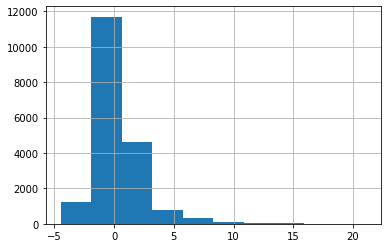

In [113]:
result_list.append(pd.Series(np.var(model.delta_log.detach().cpu().numpy(),axis=0),index=random_index_split[split_index]))
pd.concat(result_list).sort_index().sort_values().hist()#[marker_unique_exp_data_idx]

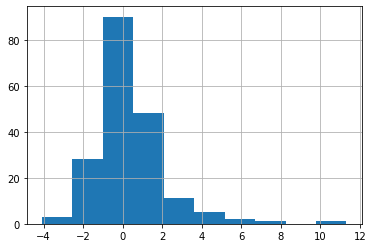

In [114]:
pd.concat(result_list).sort_index()[marker_unique_exp_data_idx].hist()

In [98]:
model.delta_log.shape

torch.Size([5, 1000])

(array([173., 602., 199.,  21.,   3.,   0.,   0.,   0.,   0.,   2.]),
 array([-5.587153  , -3.53895277, -1.49075253,  0.5574477 ,  2.60564794,
         4.65384817,  6.7020484 ,  8.75024864, 10.79844887, 12.8466491 ,
        14.89484934]),
 <a list of 10 Patch objects>)

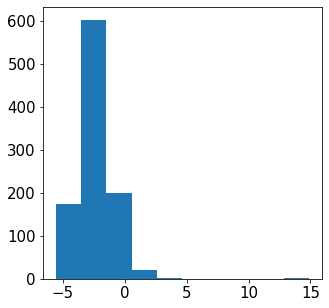

In [73]:
plt.rcParams["figure.figsize"] = (5,5)
#model.delta_log,
#plt.hist(model.beta[0].detach().cpu().numpy())
#plt.hist(model.delta_log.detach().cpu().numpy())
plt.hist(model.beta[0].detach().cpu().numpy())

(array([   9.,   42.,   59.,   90.,  151.,  322., 1141., 1184., 1022.,
         980.]),
 array([-7.68707392, -6.71838244, -5.74969096, -4.78099947, -3.81230799,
        -2.84361651, -1.87492503, -0.90623354,  0.06245794,  1.03114942,
         1.99984091]),
 <a list of 10 Patch objects>)

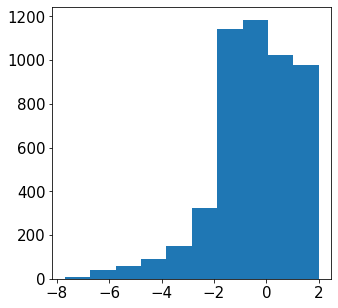

In [69]:
plt.rcParams["figure.figsize"] = (5,5)
plt.hist(model.delta_log.detach().cpu().numpy().flatten())

(array([  2.,   7.,  16.,  33.,  56.,  84., 110., 158., 249., 285.]),
 array([-1.41334392, -1.07202543, -0.73070695, -0.38938847, -0.04806999,
         0.29324849,  0.63456698,  0.97588546,  1.31720394,  1.65852242,
         1.99984091]),
 <a list of 10 Patch objects>)

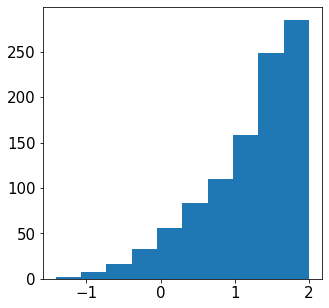

In [80]:
plt.hist(np.max(model.delta_log.detach().cpu().numpy(),axis=0))

{'Cholangiocytes': ['KRT19',
  'EPCAM',
  'FXYD2',
  'CLDN4',
  'CLDN10',
  'SOX9',
  'MMP7',
  'CXCL1',
  'CFTR',
  'TFF2',
  'KRT7',
  'CD24'],
 'Mature_B_cells': ['MS4A1', 'IGHD', 'CD79A', 'PTPRC', 'IGKC', 'CD19'],
 'Hepatocytes': ['ALB', 'HAMP', 'ARG1', 'PCK1', 'AFP', 'BCHE'],
 'LSECs': ['CALCRL', 'VWF', 'PECAM1', 'CLEC14A', 'EMCN'],
 'Hepatic_Stellate_Cells': ['ACTA2',
  'COL1A1',
  'TAGLN',
  'COL1A2',
  'COL3A1',
  'SPARC',
  'RBP1',
  'DCN',
  'MYL9'],
 'Macrophages': ['CD68', 'MARCO', 'FCGR3A', 'LYZ', 'PTPRC', 'AIF1'],
 'ab_T_cells': ['CD2', 'CD3D', 'TRAC', 'IL32', 'CD3E', 'PTPRC'],
 'gd_T_cells': ['NKG7',
  'FCGR3A',
  'HOPX',
  'GNLY',
  'CMC1',
  'KLRF1',
  'CCL3',
  'PTPRC'],
 'NK_cells': ['GZMK', 'KLRF1', 'CCL3', 'CMC1', 'NKG7', 'PTPRC'],
 'Plasma_cells': ['CD27', 'IGHG1', 'IGHA1', 'IGHM', 'CD79A', 'PTPRC', 'IGKC'],
 'Erythroid_cells': ['HBB', 'SLC25A37', 'CA1', 'ALAS2'],
 'other': []}

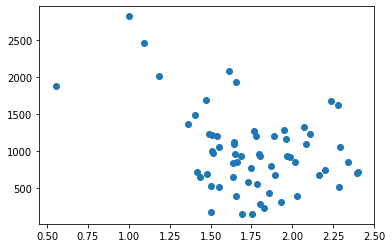

In [150]:
#plt.hist(np.max(model.delta_log.detach().cpu().numpy(),axis=0))
plt.scatter(
np.max(model.delta_log.detach().cpu().numpy(),axis=0),
np.var(model.delta_log.detach().cpu().numpy(),axis=0))

clustername_to_markers

In [165]:
plot_value,exp_data_meta_clusterid_clusteridunique
plot_value[(exp_data_meta_clusterid_clusteridunique==8).values]
#6 ab -> 7
#8 nk -> 7,8

g1=(plot_value==8)&(exp_data_meta_clusterid_clusteridunique==8)
g2=(plot_value==7)&(exp_data_meta_clusterid_clusteridunique==8) # new subtype
g3=pd.Series(plot_value==0)
g4=pd.Series(exp_data_meta_clusterid_clusteridunique==0)
g5=pd.Series(exp_data_meta_clusterid_clusteridunique==6)
g6=pd.Series(exp_data_meta_clusterid_clusteridunique==8)
g7=pd.Series(exp_data_meta_clusterid_clusteridunique==2)
#clustername_to_markers


#marker_unique_exp_data_idx
#clustername_to_markers
np.log(exp_data[:,:].mean(axis=1)).shape

(20007,)

/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


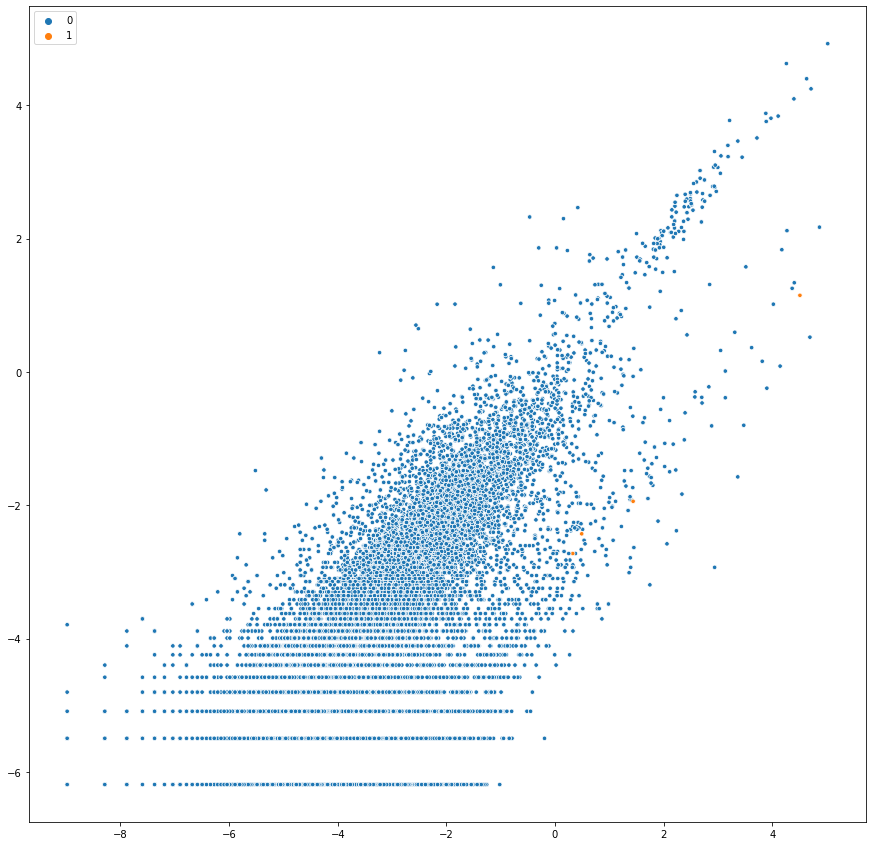

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

plt.rcParams["figure.figsize"] = (15,15)


ax=sns.scatterplot(x=np.log(exp_data[:,~g6.values].mean(axis=1)),y=np.log(exp_data[:,g6.values].mean(axis=1)),hue=[1 if m in ['ALB', 'HAMP', 'ARG1', 'PCK1', 'AFP', 'BCHE'] else 0 for m in exp_data_row],s=20)

def txt_scatter(x,y,val,ax):
    for i in range(len(val)):
        #print(x,y,val)
        break
        if 2*x[i]<np.max(x):
            break
        if 2*y[i]<np.max(y):
            break        
        ax.text(x[i]+.02, y[i], str(val[i]))
    
    
txt_scatter(exp_data[:,g1.values].mean(axis=1), exp_data[:,g2.values].mean(axis=1), exp_data_col, ax)

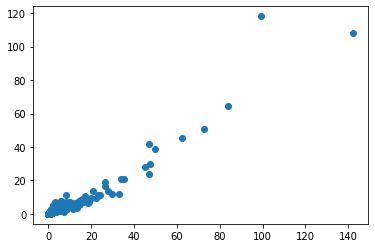

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline




ax=plt.scatter(exp_data[:,g1.values].mean(axis=1),exp_data[:,g2.values].mean(axis=1))

def txt_scatter(x,y,val,ax):
    for i in range(len(val)):
        #print(x,y,val)
        break
        if 2*x[i]<np.max(x):
            break
        if 2*y[i]<np.max(y):
            break        
        ax.text(x[i]+.02, y[i], str(val[i]))
    
    
txt_scatter(exp_data[:,g1.values].mean(axis=1), exp_data[:,g2.values].mean(axis=1), exp_data_col, ax)

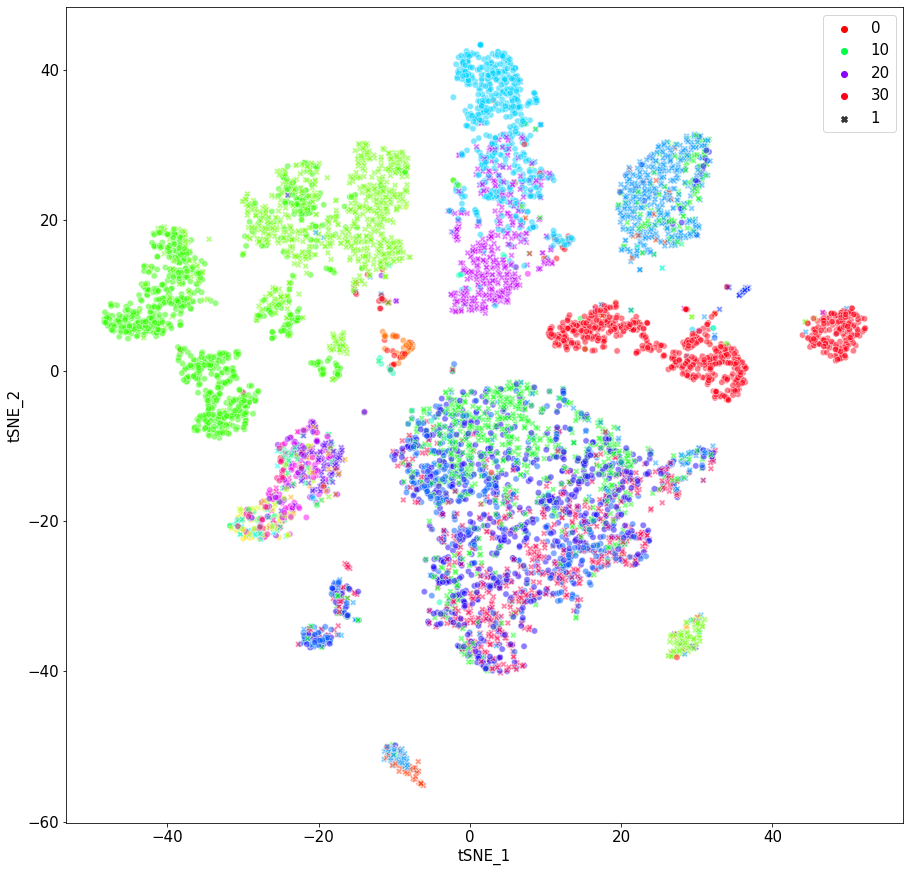

In [83]:
import seaborn as sns

plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams["font.size"] = 15
plt.rcParams['font.family']='Arial'


plot_value=np.argmax(Poisson_Function_Nomask.apply(batch_Y,batch_X,batch_s,model.delta_log,model.beta,"gamma").detach().cpu().numpy(),axis=1)

sns.scatterplot(x="tSNE_1", y="tSNE_2",hue=plot_value,style=np.array((list(range(0,2))*30))[plot_value],
                data=exp_data_meta,s=40,palette=plt.cm.hsv,alpha=0.5)#,linewidth=0.3)

In [70]:
Y=exp_data[marker_unique_exp_data_idx].transpose().astype(float)

cell_dataset=Cell_Dataset(Y,X,s)
cell_dataloader=DataLoader(dataset=cell_dataset,shuffle=False,batch_size=BATCH_SIZE,num_workers=NUM_WORKERS)

model=Custom_Model_Trick(Y,rho,X_col=X.shape[1],delta_min=delta_min,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)
optimizer = optim.Adam(model.parameters(),lr=LR)#,betas=(0.92, 0.999))
run_EM_trick(model,optimizer)

Start time: 2020-05-12 22:56:04
tensor(-7125702.5534, device='cuda:1')
M: 0, Q: 7125702.553377966 Q_diff: -2.0
M: 20, Q: 1835536.2995025818 Q_diff: 0.7424062700129913
M: 40, Q: 1540042.6462873905 Q_diff: 0.16098491394328085
M: 60, Q: 1370018.6635169045 Q_diff: 0.1104021263179731
M: 80, Q: 1268172.334764223 Q_diff: 0.07433937322520623
M: 100, Q: 1234264.6637258779 Q_diff: 0.026737431584682274
M: 120, Q: 1214356.7869793014 Q_diff: 0.016129341892103233
M: 140, Q: 1203170.5765228618 Q_diff: 0.009211634155942833
M: 160, Q: 1195508.44378454 Q_diff: 0.006368284670379152
M: 180, Q: 1189933.8842588095 Q_diff: 0.004662919408652229
M: 200, Q: 1185774.5047629373 Q_diff: 0.00349547109372635
M: 220, Q: 1182633.1606929083 Q_diff: 0.0026491917792219725
M: 240, Q: 1180209.943276233 Q_diff: 0.0020490017506827945
M: 260, Q: 1178317.9393620454 Q_diff: 0.0016031079258114935
M: 280, Q: 1176855.3278819565 Q_diff: 0.0012412706547443204
M: 300, Q: 1175727.974816646 Q_diff: 0.0009579368326771853
M: 320, Q: 1174

(tensor([[ 1.7156e-13,  0.0000e+00,  2.2074e-74,  ...,  0.0000e+00,
           0.0000e+00,  9.3442e-01],
         [ 1.0000e+00,  0.0000e+00,  7.9250e-19,  ...,  0.0000e+00,
           0.0000e+00,  2.9575e-23],
         [ 7.7559e-15,  0.0000e+00,  6.8351e-58,  ...,  0.0000e+00,
           0.0000e+00,  7.8555e-06],
         ...,
         [ 1.0000e+00,  0.0000e+00,  2.4021e-50,  ...,  0.0000e+00,
           0.0000e+00,  5.7594e-11],
         [ 5.0849e-28,  0.0000e+00,  8.3112e-63,  ...,  0.0000e+00,
           0.0000e+00,  3.5417e-20],
         [ 6.8033e-07,  0.0000e+00,  1.6394e-37,  ..., 6.5577e-295,
           0.0000e+00,  9.5323e-01]], device='cuda:1'),
 tensor(1171636.6481, device='cuda:1', grad_fn=<NegBackward>),
 tensor(-1171636.6481, device='cuda:1'))

75

In [ ]:
def run_EM_trick(model,optimizer):
    global gamma_new,LL_new
    
    print('Start time:',datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
    
    with torch.no_grad():
        for batch_idx,batch in enumerate(cell_dataloader):
            batch_Y=batch['Y'].to(device)
            batch_X=batch['X'].to(device)
            batch_s=batch['s'].to(device)    
        LL_old=model(batch_Y,batch_X,batch_s)
        Q_old=LL_old
    print(LL_old)

    for em_idx in range(EM_ITER_MAX):#
        #optimizer = optim.Adam(model.parameters(),lr=0.1,eps=1e-3,betas=(0.9,0.999))
        LL_new=torch.zeros_like(LL_old)
        #optimizer = optim.Adam(model.parameters(),lr=LR)
        for batch_idx,batch in enumerate(cell_dataloader):
            # It is usually just one iteration(batch).
            # However, developer of cellAssign may have done this for extreme situation of larse sample size
            batch_Y=batch['Y'].to(device)
            batch_X=batch['X'].to(device)
            batch_s=batch['s'].to(device)

            #############
            #M-step
            #############
            for m_idx in range(M_ITER_MAX):#
            #for m_idx in range(20):#    
                optimizer.zero_grad()
                Q_new=-model(batch_Y,batch_X,batch_s)
                Q_new.backward()
                optimizer.step()
                
                #Constraint
                model.delta_log.data=model.delta_log.data.clamp(min=model.delta_log_min)
                #model.NB_basis_a.data=model.NB_basis_a.data.clamp(min=0)

                if m_idx%20==0:
                    #print(sorted(model.delta_log.cpu().detach().numpy().flatten())[-10:])
                    Q_diff=(Q_old-Q_new)/torch.abs(Q_old)
                    Q_old=Q_new
                    print('M: {}, Q: {} Q_diff: {}'.format(m_idx,Q_new,Q_diff))    
                    if m_idx>0 and torch.abs(Q_diff)<(1e-1*Q_diff_tolerance):
                        print('M break')
                        break                
            #############
            #Look at LL
            #############
            with torch.no_grad():
                LL_temp=-Q_new
                LL_new+=LL_temp

        LL_diff=(LL_new-LL_old)/torch.abs(LL_old)
        LL_old=LL_new
        print('EM: {}, LL: {} LL_diff: {}'.format(em_idx,LL_new,LL_diff))
        if LL_diff<LL_diff_tolerance:
            print('EM break')
            break
    print('End time:',datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))    
    
    with torch.no_grad():
        gamma_new=Poisson_Function.apply(batch_Y,batch_X,batch_s,model.delta_log,model.beta,model.masked.mask,'gamma')
    return gamma_new,Q_new,LL_new

In [37]:
#rho.shape,
Y.shape

(8444, 63)

In [323]:
#pd.Series(batch_Y.var(axis=0).cpu().numpy()).sort_values(ascending=False)[:1000]
#pd.Series(exp_data.var(axis=1)).sort_values(ascending=False)[300:10000].hist()#
#pd.Series(exp_data.var(axis=1))[marker_unique_exp_data_idx].sort_values(ascending=False).shape
#Poisson_logprob?
#exp_data
#exp_data.var(axis=1)
#poisson_logprob(rate=torch.Tensor(exp_data.mean(axis=1)),value=torch.Tensor(exp_data))
#torch.Tensor(exp_data.mean(axis=1)).shape
#exp_data_device=torch.Tensor(exp_data).to(device)
#result=poisson_logprob(rate=torch.Tensor(exp_data).mean(axis=1),value=torch.Tensor(exp_data).transpose(0,1))

#sum_data[marker_unique_exp_data_idx].sort_values(ascending=False)

In [35]:
"""
exp_data=mmread('data/koh_extract/koh.data.counts.mm').toarray().astype(float)
with open('data/koh_extract/koh.data.col','r') as f: exp_data_col=[i.strip().strip('"') for i in f.read().split()]
with open('data/koh_extract/koh.data.row','r') as f: exp_data_row=[i.strip().strip('"') for i in f.read().split()]
assert exp_data.shape==(len(exp_data_row),len(exp_data_col))

clustername_to_markers=pd.read_csv('data/koh_extract/koh.rho.tsv',sep='\t').T

clustername_to_markers

len(clustername_to_markers.loc[['Sclrtm','D5CntrlDrmmtm']].T.iloc[:,1][clustername_to_markers.loc[['Sclrtm','D5CntrlDrmmtm']].T.iloc[:,1]==1].index.intersection(
    clustername_to_markers.loc[['Sclrtm','D5CntrlDrmmtm']].T.iloc[:,0][clustername_to_markers.loc[['Sclrtm','D5CntrlDrmmtm']].T.iloc[:,0]==1].index
)),len(clustername_to_markers.loc[['Sclrtm','D5CntrlDrmmtm']].T.iloc[:,1][clustername_to_markers.loc[['Sclrtm','D5CntrlDrmmtm']].T.iloc[:,1]==1].index)

clustername_unique=list(clustername_to_markers.index)
#exp_data_meta_clusterid_clusteridunique=exp_data_meta['celltype'].apply(lambda x: clustername_unique.index(x))

marker_unique=list(clustername_to_markers.columns)
marker_unique_exp_data_idx=[exp_data_row.index(marker) for marker in marker_unique]
"""

'\nexp_data=mmread(\'data/koh_extract/koh.data.counts.mm\').toarray().astype(float)\nwith open(\'data/koh_extract/koh.data.col\',\'r\') as f: exp_data_col=[i.strip().strip(\'"\') for i in f.read().split()]\nwith open(\'data/koh_extract/koh.data.row\',\'r\') as f: exp_data_row=[i.strip().strip(\'"\') for i in f.read().split()]\nassert exp_data.shape==(len(exp_data_row),len(exp_data_col))\n\nclustername_to_markers=pd.read_csv(\'data/koh_extract/koh.rho.tsv\',sep=\'\t\').T\n\nclustername_to_markers\n\nlen(clustername_to_markers.loc[[\'Sclrtm\',\'D5CntrlDrmmtm\']].T.iloc[:,1][clustername_to_markers.loc[[\'Sclrtm\',\'D5CntrlDrmmtm\']].T.iloc[:,1]==1].index.intersection(\n    clustername_to_markers.loc[[\'Sclrtm\',\'D5CntrlDrmmtm\']].T.iloc[:,0][clustername_to_markers.loc[[\'Sclrtm\',\'D5CntrlDrmmtm\']].T.iloc[:,0]==1].index\n)),len(clustername_to_markers.loc[[\'Sclrtm\',\'D5CntrlDrmmtm\']].T.iloc[:,1][clustername_to_markers.loc[[\'Sclrtm\',\'D5CntrlDrmmtm\']].T.iloc[:,1]==1].index)\n\nclust

In [38]:
from functools import reduce

def rank_get(series,marker_unique_exp_data_idx):
    print(series.sort_values())
    print(series[marker_unique_exp_data_idx].sort_values())
    print(series[series<series[marker_unique_exp_data_idx].min()].shape[0],
          '-----',
          series[series>series[marker_unique_exp_data_idx].max()].shape[0]
         )
criteria_list=[]    

In [39]:
cellcount_data=pd.Series(np.sum(exp_data>0,axis=1))
rank_get(cellcount_data,marker_unique_exp_data_idx)
criteria_list.append(cellcount_data[cellcount_data>10].index)
#len(reduce(lambda x, y: x.intersection(y), criteria_list)),
len(reduce(lambda x, y: x.intersection(y), criteria_list)),len(reduce(lambda x, y: x.intersection(y), criteria_list).intersection(pd.Index(marker_unique_exp_data_idx)))


10469       1
14085       1
5511        2
13695       2
15750       2
         ... 
19987    8441
19991    8443
19988    8444
19984    8444
19985    8444
Length: 20007, dtype: int64
19903      28
7825       31
11010      35
16544      64
14080      70
         ... 
18480    2873
2569     3017
17699    3142
6941     3240
4789     7991
Length: 63, dtype: int64
5300 ----- 58


(16772, 63)

In [40]:
print(exp_data.shape)
mean_data=pd.Series(exp_data.mean(axis=1))
rank_get(mean_data,marker_unique_exp_data_idx)

(20007, 8444)
14085      0.000118
10469      0.000118
10452      0.000237
10394      0.000237
2341       0.000237
            ...    
19988    101.687115
11091    103.116059
19985    109.213169
10369    123.351847
19984    151.015396
Length: 20007, dtype: float64
7825      0.004974
11010     0.008527
15178     0.013264
14080     0.014567
16723     0.019659
           ...    
14078     8.821175
14077     9.772027
10258    31.958432
2569     46.664732
4789     85.910706
Length: 63, dtype: float64
5973 ----- 5


In [41]:
mean_real_data=pd.Series(np.apply_along_axis(lambda x:x[x!=0].mean(), axis=1, arr=exp_data))
rank_get(mean_real_data,marker_unique_exp_data_idx)

0          1.000000
13443      1.000000
13444      1.000000
13445      1.000000
13446      1.000000
            ...    
10369    126.436392
2569     130.605568
19984    151.015396
19329    169.116654
19330    209.700557
Length: 20007, dtype: float64
15178      1.191489
4790       1.325942
7825       1.354839
14080      1.757143
4924       1.805556
            ...    
14077     62.088036
14078     74.860302
4789      90.780878
10258    102.529255
2569     130.605568
Length: 63, dtype: float64
15104 ----- 3


In [42]:
var_data=pd.Series(exp_data.var(axis=1))
rank_get(var_data,marker_unique_exp_data_idx)
criteria_list.append(var_data.sort_values()[int(len(var_data)/20):].index)
len(reduce(lambda x, y: x.intersection(y), criteria_list)),len(reduce(lambda x, y: x.intersection(y), criteria_list).intersection(pd.Index(marker_unique_exp_data_idx)))

10469         0.000118
14085         0.000118
10394         0.000237
13695         0.000237
473           0.000237
             ...      
19330    103693.849816
10258    159137.845146
10369    161478.874901
19329    178807.757121
2569     249741.149201
Length: 20007, dtype: float64
7825          0.008502
15178         0.019957
11010         0.029060
14080         0.043487
16723         0.059538
             ...      
14078     20151.129556
4789      21155.694300
14077     25113.252742
10258    159137.845146
2569     249741.149201
Length: 63, dtype: float64
6926 ----- 0


(16772, 63)

In [43]:
var_real_data=pd.Series(np.apply_along_axis(lambda x:x[x!=0].var(), axis=1, arr=exp_data))
rank_get(var_real_data,marker_unique_exp_data_idx)
criteria_list.append(var_real_data[var_real_data>1e-2].index)
criteria_list.append(var_real_data.sort_values()[int(len(var_real_data)/10):].index)
len(reduce(lambda x, y: x.intersection(y), criteria_list)),len(reduce(lambda x, y: x.intersection(y), criteria_list).intersection(pd.Index(marker_unique_exp_data_idx)))

0        0.000000e+00
4637     0.000000e+00
13147    0.000000e+00
13150    0.000000e+00
13151    0.000000e+00
             ...     
14079    1.766195e+05
10258    5.033115e+05
2569     6.880141e+05
19329    1.083758e+06
19330    1.179251e+06
Length: 20007, dtype: float64
15178         0.388864
4790          0.441433
7825          0.486993
1662          1.468998
4744          1.657769
             ...      
14081     82260.888660
14077    156312.603988
14078    166067.485007
10258    503311.524980
2569     688014.076442
Length: 63, dtype: float64
16021 ----- 2


(14580, 63)

In [44]:
del criteria_list[-1]
varratio_data=pd.Series((exp_data.var(axis=1)-exp_data.mean(axis=1))/(exp_data.mean(axis=1)))
rank_get(varratio_data,marker_unique_exp_data_idx)
criteria_list.append(varratio_data[varratio_data>1e-2].index)
criteria_list.append(varratio_data.sort_values()[int(len(varratio_data)*2/3):].index)
len(reduce(lambda x, y: x.intersection(y), criteria_list)),len(reduce(lambda x, y: x.intersection(y), criteria_list).intersection(pd.Index(marker_unique_exp_data_idx)))

2042       -0.022975
478        -0.022057
13589      -0.018543
8386       -0.018534
3345       -0.018475
            ...     
14077    2568.912212
10258    4978.526062
2569     5350.817885
19330    5814.367900
19329    6549.166595
Length: 20007, dtype: float64
15178       0.504593
4790        0.517224
7825        0.709312
1662        1.151025
4744        1.532942
            ...     
14081    1404.394563
14078    2283.404290
14077    2568.912212
10258    4978.526062
2569     5350.817885
Length: 63, dtype: float64
16496 ----- 2


(6300, 63)

In [45]:
varratio_real_data=(var_real_data-mean_real_data)/mean_real_data
rank_get(varratio_real_data,marker_unique_exp_data_idx)
criteria_list.append(varratio_real_data.sort_values()[int(len(varratio_real_data)/2):].index)
#varratio_real_data_index=var_ratio.sort_values(ascending=False)[:int(len(var_ratio)/3)].index
len(reduce(lambda x, y: x.intersection(y), criteria_list)),len(reduce(lambda x, y: x.intersection(y), criteria_list).intersection(pd.Index(marker_unique_exp_data_idx)))

0          -1.000000
13133      -1.000000
13138      -1.000000
13144      -1.000000
13147      -1.000000
            ...     
14077    2516.596203
10258    4907.955238
2569     5266.877049
19330    5622.498347
19329    6407.348140
Length: 20007, dtype: float64
15178      -0.673632
4790       -0.667079
7825       -0.640553
1662       -0.187961
4744       -0.083219
            ...     
14081    1350.963815
14078    2217.365164
14077    2516.596203
10258    4907.955238
2569     5266.877049
Length: 63, dtype: float64
16139 ----- 2


(6300, 63)

In [46]:
from scipy.stats import poisson
fitness_data=pd.Series([poisson.logpmf(mu=exp_data[i][exp_data[i]!=0].mean(),k=exp_data[i][exp_data[i]!=0]).sum()/(exp_data[i]!=0).sum() for i in range(exp_data.shape[0])])
#fitness_data=pd.Series([poisson.logpmf(mu=exp_data[i].mean(),k=exp_data[i]).sum() for i in range(exp_data.shape[0])])

rank_get(fitness_data,marker_unique_exp_data_idx)
criteria_list.append(fitness_data.sort_values()[:int(len(fitness_data)/2)].index)

len(reduce(lambda x, y: x.intersection(y), criteria_list)),len(reduce(lambda x, y: x.intersection(y), criteria_list).intersection(pd.Index(marker_unique_exp_data_idx)))

19330   -580.206184
19329   -551.640917
2569    -400.012219
10258   -341.530396
14078   -202.069617
            ...    
15300     -1.000000
6902      -1.000000
15298     -1.000000
6881      -1.000000
0         -1.000000
Length: 20007, dtype: float64
2569    -400.012219
10258   -341.530396
14078   -202.069617
14077   -194.669126
14081   -141.368973
            ...    
4744      -1.543920
1662      -1.514570
7825      -1.237872
4790      -1.219073
15178     -1.157215
Length: 63, dtype: float64
2 ----- 15627


(6300, 63)

In [47]:
#del criteria_list[-1]
#len(reduce(lambda x, y: x.intersection(y), criteria_list).intersection(mean_data.loc[marker_unique_exp_data_idx].index))

In [377]:
from scipy.stats import skew
skewness_data=pd.Series((skew(exp_data,axis=1)-exp_data.mean(axis=1))/(exp_data.mean(axis=1)))

In [378]:
skewness_data=(pd.Series(skew(np.where(exp_data>0, exp_data, np.nan),axis=1,nan_policy='omit'))-(1/mean_real_data)**(0.5))/(1/mean_real_data)**(0.5)
rank_get(skewness_data,marker_unique_exp_data_idx)
criteria_list.append(skewness_data.sort_values()[int(len(skewness_data)/10):].index)
len(reduce(lambda x, y: x.intersection(y), criteria_list)),len(reduce(lambda x, y: x.intersection(y), criteria_list).intersection(mean_data.loc[marker_unique_exp_data_idx].index))

264      -6.336310
4189     -0.591329
4638      7.235799
2066      8.171307
4667      8.363296
           ...    
4       274.935982
3       298.714895
2       322.877308
1       330.393110
0       348.925976
Length: 4898, dtype: float64
2810     12.802095
4795     16.705553
2227     17.187219
2932     17.711638
3691     18.323440
           ...    
2786     89.032255
2262     90.881651
2702     95.976042
378     101.157913
2835    133.758597
Length: 84, dtype: float64
57 ----- 42


(4332, 76)

In [265]:
from functools import reduce

criteria_list
criteria_list_reduce=reduce(lambda x, y: x.intersection(y), criteria_list)
len(criteria_list_reduce.intersection(mean_data.loc[marker_unique_exp_data_idx].index))
len(reduce(lambda x, y: x.intersection(y), criteria_list).intersection(mean_data.loc[marker_unique_exp_data_idx].index))
#fitness=pd.Series(result.sum(axis=0).numpy())
#result,exp_data
#np.where(exp_data)
#result.shape
#result=poisson_logprob(rate=torch.Tensor(exp_data).mean(axis=1),value=torch.Tensor(exp_data).transpose(0,1))
#exp_data.mean(axis=1)
#np.apply_along_axis(lambda x:x[x!=0].mean(), axis=1, arr=exp_data),\
#np.apply_along_axis(lambda x:x.mean(), axis=1, arr=exp_data)

#mean_real_data.shape,var_real_data.shape

58

In [192]:
realmean_data.sort_values()[15000:],realmean_data[marker_unique_exp_data_idx].sort_values()

(1115       1.186170
 14034      1.186217
 2949       1.186285
 6251       1.186286
 19830      1.186296
             ...    
 10369    126.436392
 2569     130.605568
 19984    151.015396
 19329    169.116654
 19330    209.700557
 Length: 5007, dtype: float64, 15178      1.191489
 4790       1.325942
 7825       1.354839
 14080      1.757143
 4924       1.805556
             ...    
 14077     62.088036
 14078     74.860302
 4789      90.780878
 10258    102.529255
 2569     130.605568
 Length: 63, dtype: float64)

In [159]:

mean_data.sort_values(ascending=False)[14000:],mean_data[marker_unique_exp_data_idx].sort_values(ascending=False)

(18543    0.004974
 6091     0.004974
 16157    0.004974
 1542     0.004974
 5098     0.004974
            ...   
 2341     0.000237
 10394    0.000237
 10452    0.000237
 10469    0.000118
 14085    0.000118
 Length: 6007, dtype: float64, 4789     85.910706
 2569     46.664732
 10258    31.958432
 14077     9.772027
 14078     8.821175
            ...    
 16723     0.019659
 14080     0.014567
 15178     0.013264
 11010     0.008527
 7825      0.004974
 Length: 63, dtype: float64)

In [128]:
var_ratio.sort_values(ascending=False)[:int(len(var_ratio)/3)]

19329    6549.166595
19330    5814.367900
2569     5350.817885
10258    4978.526062
14077    2568.912212
            ...     
9318        0.205169
2041        0.205129
4329        0.205095
15458       0.205062
9374        0.205055
Length: 6669, dtype: float64

In [113]:
#var_ratio=pd.Series((exp_data.var(axis=1)-exp_data.mean(axis=1))/(exp_data.mean(axis=1)))
#fitness=pd.Series(result.sum(axis=0).numpy())



In [120]:
a=var_ratio[var_ratio>0.5].index
b=fitness[fitness<-2.738775e+02].index
c=skewness[skewness<4886].index
len(a),len(b),len(a.intersection(b).intersection(c))

(3536, 13941, 3213)

In [91]:
pd.Series(result.sum(axis=0).numpy())[marker_unique_exp_data_idx].sort_values(ascending=True),\
(pd.Series(result.sum(axis=0).numpy()).sort_values(ascending=True)<-2.738775e+02).sum(),\


(2569    -1.612377e+06
 10258   -1.213484e+06
 4789    -7.630430e+05
 14077   -4.112879e+05
 14078   -3.603452e+05
              ...     
 16723   -8.994186e+02
 14080   -7.000721e+02
 15178   -6.125449e+02
 11010   -4.561765e+02
 7825    -2.738775e+02
 Length: 63, dtype: float64, 13941)

In [73]:
pd.Series((exp_data.var(axis=1)-exp_data.mean(axis=1))/(exp_data.mean(axis=1)))[marker_unique_exp_data_idx].sort_values(ascending=False),\
(pd.Series((exp_data.var(axis=1)-exp_data.mean(axis=1))/(exp_data.mean(axis=1)))>0.5).sum()

(2569     5350.817885
 10258    4978.526062
 14077    2568.912212
 14078    2283.404290
 14081    1404.394563
             ...     
 4744        1.532942
 1662        1.151025
 7825        0.709312
 4790        0.517224
 15178       0.504593
 Length: 63, dtype: float64, 3536)

In [39]:
device=device_cuda_list[4]#
#device=device_cpu
#model=Custom_Model(Y,rho,X_col=X.shape[1],delta_min=delta_min,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)
#model_trick=Custom_Model_Trick(Y,rho,X_col=X.shape[1],delta_min=delta_min,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)
#optimizer = optim.Adam(model.parameters(),lr=LR)#,betas=(0.92, 0.999))

#optimizer_trick = optim.LBFGS(model_trick.parameters())#,lr=LR)#,betas=(0.92, 0.999))
#optimizer_trick = optim.LBFGS(list(model_trick.parameters())[:-1],lr=1,history_size=40,line_search_fn='strong_wolfe')#,lr=LR)#,betas=(0.92, 0.999))

#optimizer_trick = optim.Adam(model_trick.parameters(),lr=LR)#,betas=(0.92, 0.999))
#optimizer_trick = optim.Adagrad(model_trick.parameters(),lr=LR)#,betas=(0.92, 0.999))
#mu.value
#    def forward(self,rate,value):
#Y=exp_data[marker_unique_exp_data_idx].transpose().astype(float)
#Y.shape

#model_trick=Custom_Model_Trick(Y,rho,X_col=X.shape[1],delta_min=delta_min,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)
#poisson_logprob(rate=,value=)
#Y_logprob=poisson_logprob(rate=mu,value=Y_extend) # (N,C,G)Poisson_logprob??


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 4., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [94]:
def run_EM_trick_new(model,optimizer):
    global gamma_new,LL_new
    
    print('Start time:',datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
    
    with torch.no_grad():
        for batch_idx,batch in enumerate(cell_dataloader):
            batch_Y=batch['Y'].to(device)
            batch_X=batch['X'].to(device)
            batch_s=batch['s'].to(device)    
        LL_old=model(batch_Y,batch_X,batch_s)
        Q_old=LL_old
    print(LL_old)

    for em_idx in range(EM_ITER_MAX):#
        #optimizer = optim.Adam(model.parameters(),lr=0.1,eps=1e-3,betas=(0.9,0.999))
        LL_new=torch.zeros_like(LL_old)
        #optimizer = optim.Adam(model.parameters(),lr=LR)
        for batch_idx,batch in enumerate(cell_dataloader):
            # It is usually just one iteration(batch).
            # However, developer of cellAssign may have done this for extreme situation of larse sample size
            batch_Y=batch['Y'].to(device)
            batch_X=batch['X'].to(device)
            batch_s=batch['s'].to(device)

            #############
            #M-step
            #############
            for m_idx in range(M_ITER_MAX):#
            #for m_idx in range(20):#    
                optimizer.zero_grad()
                Q_new=-model(batch_Y,batch_X,batch_s)
                Q_new.backward()
                optimizer.step()
                
                #Constraint
                model.delta_log.data=model.delta_log.data.clamp(min=model.delta_log_min)
                #model.NB_basis_a.data=model.NB_basis_a.data.clamp(min=0)

                if m_idx%20==0:
                    #print(sorted(model.delta_log.cpu().detach().numpy().flatten())[-10:])
                    Q_diff=(Q_old-Q_new)/torch.abs(Q_old)
                    Q_old=Q_new
                    print('M: {}, Q: {} Q_diff: {}'.format(m_idx,Q_new,Q_diff))    
                    if m_idx>0 and torch.abs(Q_diff)<(1e-1*Q_diff_tolerance):
                        print('M break')
                        break                
            #############
            #Look at LL
            #############
            with torch.no_grad():
                LL_temp=-Q_new
                LL_new+=LL_temp

        LL_diff=(LL_new-LL_old)/torch.abs(LL_old)
        LL_old=LL_new
        print('EM: {}, LL: {} LL_diff: {}'.format(em_idx,LL_new,LL_diff))
        if LL_diff<LL_diff_tolerance:
            print('EM break')
            break
    print('End time:',datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))    
    
    with torch.no_grad():
        gamma_new=Poisson_Function.apply(batch_Y,batch_X,batch_s,model.delta_log,model.beta,model.masked.mask,'gamma')
    return gamma_new,Q_new,LL_new

run_EM_trick_new(model_trick,optimizer_trick)

Start time: 2020-05-12 02:15:40
tensor(-7180010.0976, device='cuda:1')
M: 0, Q: 7180010.097624756 Q_diff: -2.0
M: 20, Q: 1773109.1561807096 Q_diff: 0.7530492113420177
M: 40, Q: 1481422.0399876623 Q_diff: 0.16450601203895618
M: 60, Q: 1300719.1678171733 Q_diff: 0.12197933289286961
M: 80, Q: 1197517.5736147342 Q_diff: 0.07934194925075856
M: 100, Q: 1162945.46387467 Q_diff: 0.028869814106950883
M: 120, Q: 1142690.3530425527 Q_diff: 0.017417077121253684
M: 140, Q: 1131320.2629009401 Q_diff: 0.009950281028747916
M: 160, Q: 1123537.9329335953 Q_diff: 0.006878980446606134
M: 180, Q: 1117894.2571853506 Q_diff: 0.005023128799495714
M: 200, Q: 1113700.7224717268 Q_diff: 0.003751280308195116
M: 220, Q: 1110544.1151418728 Q_diff: 0.0028343407399865263
M: 240, Q: 1108116.4091449503 Q_diff: 0.002186050931090035
M: 260, Q: 1106205.6444329184 Q_diff: 0.0017243357252568106
M: 280, Q: 1104726.672876464 Q_diff: 0.0013369770475295363
M: 300, Q: 1103586.9222250965 Q_diff: 0.0010317037502134494
M: 320, Q: 1

(tensor([[ 1.7011e-13, 1.1371e-184,  2.1659e-74,  ...,  0.0000e+00,
           0.0000e+00,  9.3453e-01],
         [ 1.0000e+00,  0.0000e+00,  8.7595e-19,  ...,  0.0000e+00,
           0.0000e+00,  2.9868e-23],
         [ 7.7604e-15, 7.1509e-136,  6.7883e-58,  ...,  0.0000e+00,
           0.0000e+00,  7.9080e-06],
         ...,
         [ 1.0000e+00, 3.1140e-229,  2.4908e-50,  ...,  0.0000e+00,
           0.0000e+00,  5.6529e-11],
         [ 5.0477e-28,  5.4748e-93,  8.2242e-63,  ...,  0.0000e+00,
           0.0000e+00,  3.5136e-20],
         [ 6.8068e-07,  1.0662e-53,  1.6320e-37,  ...,  0.0000e+00,
           0.0000e+00,  9.5325e-01]], device='cuda:1'),
 tensor(1099455.6624, device='cuda:1', grad_fn=<NegBackward>),
 tensor(-1099455.6624, device='cuda:1'))

In [87]:

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
#>>> X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
#>>> X_embedded = TSNE(n_components=2).fit_transform(X)
#>>> X_embedded.shape
#X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
#pca = PCA(n_components=2)
pca = PCA(n_components=50)
pca.fit(batch_Y.cpu().T)
a=TSNE(n_components=2,perplexity=pca.components_.T.shape[0]/100,learning_rate=pca.components_.T.shape[0]/12).fit_transform(pca.components_.T)
#pca.fit(batch_Y.cpu().T)

In [89]:
import umap
reducer = umap.UMAP()

embedding = reducer.fit_transform(pca.components_.T)
embedding.shape

(8444, 2)

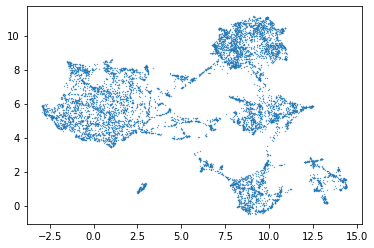

In [90]:
#plt.scatter(a[:,0],a[:,1],s=0.1)
plt.scatter(embedding[:,0],embedding[:,1],s=0.1)

In [95]:
np.sum(np.argmax(gamma_new.cpu().numpy(),axis=1)==exp_data_meta_clusterid_clusteridunique)

7240

In [49]:
run_quasi_trick(model_trick,optimizer_trick)

Start time: 2020-05-12 01:53:49
tensor(-1099456.1682, device='cuda:1')
tensor(1099456.1682, device='cuda:1', grad_fn=<NegBackward>)
M: 0, Q: 1099456.1682166199 Q_diff: -2.0
tensor(1099455.7576, device='cuda:1', grad_fn=<NegBackward>)
tensor(1099455.3060, device='cuda:1', grad_fn=<NegBackward>)
tensor(1099455.0089, device='cuda:1', grad_fn=<NegBackward>)
tensor(1099454.8198, device='cuda:1', grad_fn=<NegBackward>)
tensor(1099454.5620, device='cuda:1', grad_fn=<NegBackward>)
tensor(1099454.1900, device='cuda:1', grad_fn=<NegBackward>)
tensor(1099453.8310, device='cuda:1', grad_fn=<NegBackward>)
tensor(1099453.5737, device='cuda:1', grad_fn=<NegBackward>)
tensor(1099453.3604, device='cuda:1', grad_fn=<NegBackward>)
tensor(1099453.0934, device='cuda:1', grad_fn=<NegBackward>)
tensor(1099452.7687, device='cuda:1', grad_fn=<NegBackward>)
tensor(1099452.4649, device='cuda:1', grad_fn=<NegBackward>)
tensor(1099452.2224, device='cuda:1', grad_fn=<NegBackward>)
tensor(1099452.0001, device='cuda:

(tensor([[ 1.6853e-13, 1.1371e-184,  1.9789e-74,  ...,  0.0000e+00,
           0.0000e+00,  9.3441e-01],
         [ 1.0000e+00,  0.0000e+00,  1.3365e-18,  ...,  0.0000e+00,
           0.0000e+00,  3.0054e-23],
         [ 7.6974e-15, 7.1401e-136,  6.3589e-58,  ...,  0.0000e+00,
           0.0000e+00,  7.8953e-06],
         ...,
         [ 1.0000e+00, 3.0021e-229,  3.3622e-50,  ...,  0.0000e+00,
           0.0000e+00,  5.4478e-11],
         [ 5.0515e-28,  5.4746e-93,  8.3509e-63,  ...,  0.0000e+00,
           0.0000e+00,  3.5130e-20],
         [ 6.8113e-07,  1.0662e-53,  1.6319e-37,  ...,  0.0000e+00,
           0.0000e+00,  9.5322e-01]], device='cuda:1'),
 tensor(1099450.4978, device='cuda:1', grad_fn=<NegBackward>),
 tensor(-1099450.4978, device='cuda:1'))

In [176]:
# NB 90초
# poisson 40초
# 논문에 안 쓰여있는 알수없는 prior 제거 13초
# M step iteration에서 gamma도 동시에 update 9초
# gradient hard coding 7초


#run_EM_trick(model_trick,optimizer_trick)
np.sum(np.argmax(gamma_new.cpu().numpy(),axis=1)==exp_data_meta_clusterid_clusteridunique)

5708

In [63]:
run_EM(model,optimizer)

Start time: 2020-05-12 01:13:18
tensor(-7370950.8306, device='cuda:1')
tensor(7370950.8306, device='cuda:1')
M: 0, Q: 7370950.830554113 Q_diff: 0.0
M: 20, Q: 1880753.4015409625 Q_diff: 0.7448424979658185
M: 40, Q: 1508509.2910733821 Q_diff: 0.19792286971943726
M: 60, Q: 1325523.4605786642 Q_diff: 0.12130242191913454
M: 80, Q: 1201949.5414784518 Q_diff: 0.09322650467934046
M: 100, Q: 1163651.6664692026 Q_diff: 0.03186313042903706
M: 120, Q: 1143669.134943251 Q_diff: 0.017172262199892995
M: 140, Q: 1131779.1216031886 Q_diff: 0.010396375120023192
M: 160, Q: 1123824.9922388224 Q_diff: 0.007027987363028033
M: 180, Q: 1118071.2703829927 Q_diff: 0.005119766774689228
M: 200, Q: 1113809.0885361934 Q_diff: 0.0038120842201225047
M: 220, Q: 1110606.9228499345 Q_diff: 0.0028749681783143024
M: 240, Q: 1108153.724137627 Q_diff: 0.0022088811638345703
M: 260, Q: 1106227.6134814024 Q_diff: 0.0017381258703286582
M: 280, Q: 1104732.9925805982 Q_diff: 0.0013510970821822683
M: 300, Q: 1103583.884386227 Q_di

(tensor([[ 1.7122e-13, 1.1423e-184,  2.6395e-74,  ...,  0.0000e+00,
           0.0000e+00,  9.3503e-01],
         [ 1.0000e+00,  0.0000e+00,  3.6434e-19,  ...,  0.0000e+00,
           0.0000e+00,  2.9581e-23],
         [ 7.3921e-15, 6.8021e-136,  7.4026e-58,  ...,  0.0000e+00,
           0.0000e+00,  7.5010e-06],
         ...,
         [ 1.0000e+00, 3.2324e-229,  1.2865e-50,  ...,  0.0000e+00,
           0.0000e+00,  5.9737e-11],
         [ 5.4838e-28,  5.9382e-93,  8.6818e-63,  ...,  0.0000e+00,
           0.0000e+00,  3.8351e-20],
         [ 6.7850e-07,  1.0614e-53,  1.6319e-37,  ...,  0.0000e+00,
           0.0000e+00,  9.5371e-01]], device='cuda:1'),
 tensor(1099455.2878, device='cuda:1', grad_fn=<NegBackward>),
 tensor(-1099455.0887, device='cuda:1'))

7241

7239

In [186]:
run_EM(model,optimizer)

Start time: 2020-05-12 00:50:52
tensor(-7213637.2114, device='cuda:1')
tensor(7213639.8998, device='cuda:1')
M: 0, Q: 7213639.899828661 Q_diff: 0.0
M: 20, Q: 2226942.0113029936 Q_diff: 0.6912873331317955
M: 40, Q: 2073369.3995182696 Q_diff: 0.06896120824217962
M: 60, Q: 2025180.6440963475 Q_diff: 0.02324176069788545
M: 80, Q: 2006075.5997010462 Q_diff: 0.009433748268824723
M: 100, Q: 2000589.6173226796 Q_diff: 0.002734683767243956
M: 120, Q: 1997900.8678951114 Q_diff: 0.0013439784972824303
M: 140, Q: 1996511.8898852519 Q_diff: 0.000695218682858336
M: 160, Q: 1995667.7909792252 Q_diff: 0.0004227868164988496
M: 180, Q: 1995131.451629131 Q_diff: 0.00026875181957560125
M: 200, Q: 1994782.8391869213 Q_diff: 0.00017473156564455457
M: 220, Q: 1994552.9187069342 Q_diff: 0.00011526090733804671
M: 240, Q: 1994399.8226664446 Q_diff: 7.675707124826233e-05
M break
EM: 0, LL: -1748157.1897204937 LL_diff: 0.7576593972643894
M: 0, Q: 1748281.2762062536 Q_diff: 0.12340481766145513
M: 20, Q: 1627668.596

(tensor([[ 1.1714e-13, 6.4160e-182,  1.3066e-74,  ...,  0.0000e+00,
           0.0000e+00,  9.2716e-01],
         [ 1.0000e+00,  0.0000e+00,  1.1504e-17,  ...,  0.0000e+00,
           0.0000e+00,  4.2336e-23],
         [ 4.8682e-15, 5.1515e-134,  3.8781e-58,  ...,  0.0000e+00,
           0.0000e+00,  6.4222e-06],
         ...,
         [ 1.0000e+00, 1.8435e-228,  6.4870e-50,  ...,  0.0000e+00,
           0.0000e+00,  2.3817e-11],
         [ 1.4521e-27,  3.6519e-92,  2.3415e-62,  ...,  0.0000e+00,
           0.0000e+00,  9.2001e-20],
         [ 7.3295e-07,  1.9862e-53,  1.6326e-37,  ...,  0.0000e+00,
           0.0000e+00,  9.5348e-01]], device='cuda:1'),
 tensor(1099937.1206, device='cuda:1', grad_fn=<NegBackward>),
 tensor(-1099629.9470, device='cuda:1'))

In [128]:
for batch_idx,batch in enumerate(cell_dataloader):
    # It is usually just one iteration(batch).
    # However, developer of cellAssign may have done this for extreme situation of larse sample size
    batch_Y=batch['Y'].to(device)
    batch_X=batch['X'].to(device)
    batch_s=batch['s'].to(device)

In [129]:
with torch.no_grad():
    gamma_new,_,_=model(batch_Y,batch_X,batch_s,gamma_fixed=None,mode='E')
_,_,LL=model(batch_Y,batch_X,batch_s,gamma_fixed=gamma_new,mode='LL')    
#_,Q,_=model(batch_Y,batch_X,batch_s,gamma_fixed=gamma_new,mode='M')    
(-LL).backward(),
model.beta.grad

tensor([[ 5.0393e+03,  5.3229e+03, -1.4400e+03,  5.9434e+03,  4.9649e+06,
         -3.9234e+03,  2.0229e+03,  2.9605e+03,  5.8901e+03, -2.0194e+03,
          6.3763e+03,  4.8515e+03,  5.2600e+03,  6.2673e+03,  3.6157e+03,
          4.3563e+03,  3.6138e+03,  1.2391e+05,  6.4069e+03,  6.2218e+03,
          6.2472e+03,  5.3563e+03, -2.8984e+03,  5.4055e+03,  5.7258e+03,
          5.7549e+03,  6.0846e+03,  5.8178e+03,  6.4196e+03,  6.2660e+03,
          2.7455e+03,  5.3341e+03, -2.3520e+03,  4.0050e+03, -2.4796e+04,
         -1.8476e+05,  4.9229e+03, -6.5752e+04,  6.5921e+03, -5.8935e+04,
         -4.8694e+04,  1.3351e+05, -7.8116e+02,  3.9947e+03,  5.9897e+03,
          5.9259e+03, -3.7741e+03,  1.8111e+03,  6.3787e+03,  6.2579e+03,
          5.8779e+03, -1.0240e+04, -5.7773e+03,  5.0120e+03,  4.1818e+03,
          4.9126e+03,  4.5645e+03,  6.2904e+03,  4.1899e+03,  2.1691e+03,
          5.0543e+03,  3.9775e+03,  4.8086e+03],
        [ 9.5166e+02,  1.0685e+03, -1.6765e+03,  1.0887e+03,  9

In [130]:
LL=model_trick(batch_Y,batch_X,batch_s)
(-LL).backward()
model_trick.beta.grad

tensor([[ 5.0393e+03,  5.3229e+03,  3.4840e+03,  5.9427e+03,  4.9649e+06,
         -3.9234e+03,  2.0229e+03,  2.9598e+03,  5.8891e+03,  7.6725e+02,
          6.3411e+03,  8.2145e+03,  5.4798e+03,  7.5177e+03,  5.3203e+03,
          6.0484e+03,  8.2954e+03,  8.1518e+03,  6.6243e+03,  6.5940e+03,
          6.4649e+03,  5.3552e+03,  7.8800e+02,  5.4055e+03,  5.7258e+03,
          5.7549e+03,  6.3027e+03,  5.8178e+03,  6.4185e+03,  6.4836e+03,
          8.8221e+03,  5.6685e+03,  1.9543e+04,  5.2916e+03, -2.4796e+04,
         -1.8493e+05,  6.2481e+03, -6.3087e+04,  6.3308e+03, -5.6463e+04,
         -4.6482e+04, -3.0234e+04,  9.9999e+02,  1.9109e+04,  6.2080e+03,
          6.1442e+03,  1.2663e+03,  6.5777e+03,  6.5961e+03,  6.2227e+03,
          5.8779e+03, -7.2138e+03, -5.7773e+03,  5.0109e+03,  1.4524e+04,
          4.9126e+03,  4.0622e+03,  6.5080e+03,  4.1899e+03,  2.1691e+03,
          5.2746e+03,  5.6760e+03,  4.8075e+03],
        [ 9.5166e+02,  1.0685e+03, -1.5000e+01,  1.0887e+03,  9

In [184]:
#from basic_tools import Cell_Dataset,Masked
class Poisson_Function_trick(torch.autograd.Function):
    @staticmethod
    def forward(ctx, Y, X, s, delta_log, beta):

        with torch.no_grad():
            #mu=torch.exp((X.matmul(beta)+torch.log(s.view(-1, 1))).unsqueeze(dim=1).repeat(1,delta_log.shape[0],1)+torch.exp(delta_log))
            #mu=torch.exp((X.matmul(beta)+torch.log(s.view(-1, 1))).unsqueeze(dim=1).repeat(1,delta_log.shape[0],1)+torch.exp(delta_log))
            
            X_beta_s=torch.exp((X.matmul(beta)+torch.log(s.view(-1, 1))))
            #print(X_beta_s.unsqueeze(dim=1).repeat(1,delta_log.shape[0],1).shape,delta_log.shape)
            mu=X_beta_s.unsqueeze(dim=1).repeat(1,delta_log.shape[0],1)*torch.exp(torch.exp(delta_log))
            #mu=X_beta_s.unsqueeze(dim=1).repeat(1,delta_log.shape[0],1)*torch.exp(delta_log)
            
            Y_extend=Y.unsqueeze(dim=1).repeat(1,mu.shape[1],1)
            Y_logprob=poisson_logprob(rate=mu,value=Y_extend) # (N,C,G)
            Y_logprob_reduce=Y_logprob.sum(axis=2)
            
            Y_logprob_reduce_reduce=torch.logsumexp(Y_logprob_reduce,dim=1).view(-1,1)
            
            LL=torch.sum(Y_logprob_reduce_reduce)
            
            gamma=torch.exp(Y_logprob_reduce-Y_logprob_reduce_reduce)
            A=mu-Y.unsqueeze(dim=1)        
            
            #gradient
            grad_delta_log=(A*gamma.unsqueeze(dim=2)).sum(axis=0)
            grad_beta=(X.unsqueeze(dim=2)@gamma.unsqueeze(dim=1)@A).sum(axis=0)
        
            ctx.save_for_backward(grad_delta_log,grad_beta)
            
        return LL

    @staticmethod
    def backward(ctx, grad_output):
        
        grad_Y = grad_X = grad_s = grad_delta_log = grad_beta = None
        grad_delta_log,grad_beta = ctx.saved_tensors

        return grad_Y, grad_X, grad_s, grad_delta_log, grad_beta
    
Poisson_Function.apply(batch_Y,batch_X,batch_s,model.delta_log,model.beta),Poisson_Function_trick.apply(batch_Y,batch_X,batch_s,model.delta_log,model.beta)    

(tensor(nan, device='cuda:4', dtype=torch.float16,
        grad_fn=<Poisson_FunctionBackward>),
 tensor(nan, device='cuda:4', dtype=torch.float16,
        grad_fn=<Poisson_Function_trickBackward>))

In [46]:
Poisson_Function.apply(batch_Y,batch_X,batch_s,model.delta_log,model.beta)
#optimizer.zero_grad()

tensor(-66313168.2736, device='cuda:1', grad_fn=<Poisson_FunctionBackward>)

In [36]:
#torch.set_default_dtype(torch.float32)
for batch_idx,batch in enumerate(cell_dataloader):
    # It is usually just one iteration(batch).
    # However, developer of cellAssign may have done this for extreme situation of larse sample size
    batch_Y=batch['Y'].to(device)
    batch_X=batch['X'].to(device)
    batch_s=batch['s'].to(device)

In [196]:
model.delta_log.dtype

torch.float16

In [ ]:
batch_X_beta_s=torch.exp((batch_X.matmul(beta)+torch.log(s.view(-1, 1))))

In [86]:
LL=Poisson_Function.apply(batch_Y,batch_X,batch_s,model.delta_log,model.beta)

TypeError: forward() missing 1 required positional argument: 'mask'

In [48]:
%%prun
#%%timeit  -r 5
#%%prun
#%%timeit  -r 5
#%%prun
#0.673


for i in range(100):
    LL=Poisson_Function.apply(batch_Y,batch_X,batch_s,model.delta_log,model.beta)
    #LL.backward()

TypeError: forward() missing 1 required positional argument: 'mask'

In [89]:
%%prun
#%%timeit  -r 5

# 0.923, 
# 0.550
# 0.188
for i in range(100):

    _,_,LL=model(batch_Y,batch_X,batch_s,gamma_fixed=gamma_new,mode='LL')
    LL.backward(retain_graph=True)

         5303 function calls (5103 primitive calls) in 0.916 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      100    0.642    0.006    0.642    0.006 {method 'run_backward' of 'torch._C._EngineBase' objects}
      100    0.092    0.001    0.092    0.001 {built-in method ones_like}
      300    0.029    0.000    0.029    0.000 {built-in method exp}
      100    0.028    0.000    0.028    0.000 {built-in method logsumexp}
      100    0.026    0.000    0.169    0.002 <ipython-input-31-d32819fd26f1>:34(forward)
      100    0.019    0.000    0.027    0.000 <ipython-input-26-907e124ed599>:39(forward)
      200    0.018    0.000    0.018    0.000 {built-in method sum}
      200    0.014    0.000    0.014    0.000 {method 'repeat' of 'torch._C._TensorBase' objects}
      100    0.007    0.000    0.007    0.000 {built-in method apply}
      100    0.006    0.000    0.006    0.000 {method 'matmul' of 'torch._C._TensorBase' obj

In [87]:
Q_new

tensor(7277492.1088, device='cuda:2', grad_fn=<NegBackward>)

In [61]:
%%prun

#1.09
for i in range(100):
    Q_new=model_trick(batch_Y,batch_X,batch_s)
    Q_new.backward()

         6903 function calls (6703 primitive calls) in 0.709 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      300    0.416    0.001    0.416    0.001 {method 'sum' of 'torch._C._TensorBase' objects}
      100    0.134    0.001    0.633    0.006 <ipython-input-32-ded71a0a51fe>:11(forward)
      100    0.041    0.000    0.041    0.000 {method 'run_backward' of 'torch._C._EngineBase' objects}
      100    0.026    0.000    0.026    0.000 {built-in method ones_like}
      100    0.025    0.000    0.037    0.000 <ipython-input-26-907e124ed599>:39(forward)
      100    0.014    0.000    0.014    0.000 {built-in method logsumexp}
      100    0.011    0.000    0.011    0.000 {built-in method sum}
      100    0.010    0.000    0.010    0.000 {method 'lgamma' of 'torch._C._TensorBase' objects}
      200    0.005    0.000    0.005    0.000 {method 'repeat' of 'torch._C._TensorBase' objects}
      200    0.005    0.000    0.638 

In [74]:
#%%prun

#1.09
for i in range(100):
    optimizer.zero_grad()
    _,Q_new,_=model(batch_Y,batch_X,batch_s,gamma_fixed=gamma_fixed,mode='M')
    Q_new.backward(retain_graph=True)

RuntimeError: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.

In [71]:
model(batch_Y,batch_X,batch_s,gamma_fixed=gamma_fixed,mode='M')

(tensor([[5.0194e-178, 2.0791e-147,  0.0000e+00,  ..., 3.5442e-119,
           4.5918e-35,  1.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ..., 2.3141e-273,
           5.1634e-80,  1.0000e+00],
         [4.3051e-126, 1.9187e-104,  0.0000e+00,  ...,  1.7589e-84,
           3.8782e-24,  1.0000e+00],
         ...,
         [3.2932e-226, 1.1115e-206,  0.0000e+00,  ..., 5.2638e-166,
           2.8300e-48,  1.0000e+00],
         [ 6.7585e-92,  6.6679e-75,  0.0000e+00,  ...,  5.7648e-60,
           8.6688e-20,  1.5152e-03],
         [ 5.7529e-70,  1.1473e-53,  0.0000e+00,  ...,  1.5982e-39,
           2.1246e-12,  1.0000e+00]], device='cuda:2', grad_fn=<ExpBackward>),
 tensor(7277492.1088, device='cuda:2', grad_fn=<NegBackward>),
 None)

In [65]:
gamma_fixed,_,_=model(batch_Y,batch_X,batch_s,mode='E')

In [79]:
%%prun

#1.09

for i in range(100):

    _,Q_new,_=model(batch_Y,batch_X,batch_s,gamma_fixed=gamma_fixed,mode='M')
    Q_new.backward()

RuntimeError: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.

In [48]:
%%timeit -n 100 -r 5

with torch.no_grad():
    gamma_new,_,_=model(batch_Y,batch_X,batch_s,gamma_fixed=None,mode='E')

_,Q_new,_=model(batch_Y,batch_X,batch_s,gamma_fixed=gamma_new,mode='M')

The slowest run took 7.80 times longer than the fastest. This could mean that an intermediate result is being cached.
10.8 ms ± 6.86 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)


In [85]:
%%prun

for i in range(100):
    #with torch.no_grad():
    #    gamma_new,_,_=model(batch_Y,batch_X,batch_s,gamma_fixed=None,mode='E')

    _,Q_new,_=model(batch_Y,batch_X,batch_s,gamma_fixed=gamma_new,mode='M')
    Q_new.backward(retain_graph=True)
    #optimizer.step()

         5303 function calls (5103 primitive calls) in 0.907 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      200    0.284    0.001    0.284    0.001 {built-in method sum}
      100    0.253    0.003    0.253    0.003 {method 'run_backward' of 'torch._C._EngineBase' objects}
      100    0.165    0.002    0.232    0.002 <ipython-input-26-907e124ed599>:39(forward)
      100    0.063    0.001    0.063    0.001 {built-in method logsumexp}
      100    0.036    0.000    0.036    0.000 {method 'log' of 'torch._C._TensorBase' objects}
      100    0.030    0.000    0.030    0.000 {method 'lgamma' of 'torch._C._TensorBase' objects}
      100    0.023    0.000    0.642    0.006 <ipython-input-31-d32819fd26f1>:34(forward)
      300    0.011    0.000    0.011    0.000 {built-in method exp}
      200    0.009    0.000    0.009    0.000 {method 'repeat' of 'torch._C._TensorBase' objects}
      100    0.006    0.000    0.006    0.0

In [37]:
%%prun

for i in range(100):
    with torch.no_grad():
        gamma_new,_,_=model(batch_Y,batch_X,batch_s,gamma_fixed=None,mode='E')

    _,Q_new,_=model(batch_Y,batch_X,batch_s,gamma_fixed=gamma_new,mode='M')
    optimizer.step()

TypeError: forward() got an unexpected keyword argument 'gamma_fixed'

In [62]:
%%timeit -n 1000 -r 2

with torch.no_grad():
    gamma_new,_,_=model(batch_Y[:4000],batch_X[:4000],batch_s[:4000],gamma_fixed=None,mode='E')
    gamma_new,_,_=model(batch_Y[4000:],batch_X[4000:],batch_s[4000:],gamma_fixed=None,mode='E')

8.02 ms ± 76.5 µs per loop (mean ± std. dev. of 2 runs, 1000 loops each)


In [59]:
%%timeit -n 100 -r 2

with torch.no_grad():
    gamma_new,_,_=model(batch_Y[:4000],batch_X[:4000],batch_s[:4000],gamma_fixed=None,mode='E')
    gamma_new,_,_=model(batch_Y[4000:],batch_X[4000:],batch_s[4000:],gamma_fixed=None,mode='E')

7.51 ms ± 541 µs per loop (mean ± std. dev. of 2 runs, 100 loops each)


In [61]:
%%timeit -n 10 -r 2

with torch.no_grad():
    gamma_new,_,_=model(batch_Y[:4000],batch_X[:4000],batch_s[:4000],gamma_fixed=None,mode='E')
    gamma_new,_,_=model(batch_Y[4000:],batch_X[4000:],batch_s[4000:],gamma_fixed=None,mode='E')

1.56 ms ± 432 µs per loop (mean ± std. dev. of 2 runs, 10 loops each)


In [54]:
%%timeit -n 1 -r 500

_,Q_new,_=model(batch_Y[:4000],batch_X[:4000],batch_s[:4000],gamma_fixed=gamma_new,mode='M')

RuntimeError: The size of tensor a (8444) must match the size of tensor b (4000) at non-singleton dimension 0

In [42]:

gamma_value,Q_value,LL_value=run_EM()

Start time: 2020-05-11 22:51:50
tensor(-7302881.2378, device='cuda:4')
tensor(7303007.0966, device='cuda:4')
M: 0, Q: 7303007.096593806 Q_diff: 0.0
M: 20, Q: 2182199.075500508 Q_diff: 0.7011917082049246
M: 40, Q: 1987390.1529359764 Q_diff: 0.08927183809747063
M: 60, Q: 1925161.292471651 Q_diff: 0.03131184904604391
M: 80, Q: 1901133.6006161477 Q_diff: 0.012480872095997155
M: 100, Q: 1893664.2848786358 Q_diff: 0.003928874717216715
M: 120, Q: 1890140.8191947383 Q_diff: 0.0018606601560969447
M: 140, Q: 1888379.2108189098 Q_diff: 0.0009319984828320797
M: 160, Q: 1887371.8214070443 Q_diff: 0.0005334677516538846
M: 180, Q: 1886770.849276267 Q_diff: 0.00031841745434627017
M: 200, Q: 1886403.5323817404 Q_diff: 0.00019468018316452676


KeyboardInterrupt: 

In [61]:
np.median(np.array(time_list).T[5])

IndexError: index 5 is out of bounds for axis 0 with size 5

In [ ]:
# 0.000138 zero grad 
# 0.047395 front 
# 0.057923 backward
# 0.001740 step

(array([ 1.,  2.,  0.,  1.,  1.,  0.,  1.,  0., 61., 27.]),
 array([0.00071716, 0.00083199, 0.00094681, 0.00106163, 0.00117645,
        0.00129128, 0.0014061 , 0.00152092, 0.00163574, 0.00175056,
        0.00186539]),
 <a list of 10 Patch objects>)

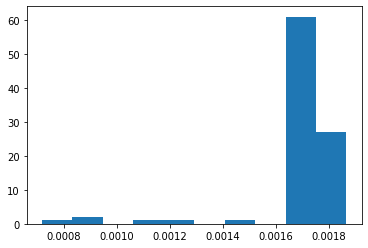

In [60]:
plt.hist(np.array(time_list).T[4])

In [ ]:
#np.isnan(M_get),M_get.shape

rho
#7363 7294 7367

In [146]:
7363/8444,7600/8444

(0.8719801042160114, 0.9000473709142587)

In [45]:
sum(np.argmax(gamma_new.cpu().numpy(),axis=1)==exp_data_meta_clusterid_clusteridunique.values),\

(7630,)

In [144]:
rho.shape

(12, 55)

In [90]:
#M_true.shape,
from scipy.stats import pearsonr
#M_get=np.array([np.mean(exp_data[marker_unique_exp_data_idx,:][:,np.argmax(gamma_new.cpu().numpy(),axis=1)==i],axis=1) for i in sorted(np.unique(np.argmax(gamma_new.cpu().numpy(),axis=1)))])
M_get=np.array([np.mean(exp_data[marker_unique_exp_data_idx,:][:,np.argmax(gamma_new.cpu().numpy(),axis=1)==i],axis=1) for i in range(rho.shape[0])])
M_get=np.nan_to_num(M_get,1)
type_mapping=[np.argmin([pearsonr(M_get[i],M_true[j])[1] for j in range(M_true.shape[0])]) for i in range(M_get.shape[0])]
sum(pd.Series(type_mapping)[np.argmax(gamma_value.cpu().numpy(),axis=1)].values==exp_data_meta_clusterid_clusteridunique.values)

/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/scipy/stats/stats.py:3399: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


7478

In [68]:
len(type_mapping)

21

range(0, 24)

In [69]:
rho.shape

(24, 63)

In [61]:
pd.Series(type_mapping)[np.argmax(gamma_value.cpu().numpy(),axis=1)].values.shape,exp_data_meta_clusterid_clusteridunique.values.shape

((8444,), (8444,))

In [64]:
np.unique(exp_data_meta_clusterid_clusteridunique.values),M_true.shape

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), (11, 63))

In [52]:
delta_min

0

In [59]:
model.delta_log_min

-inf

In [93]:
model.delta_log.exp()

tensor([[5.5438, 6.8677, 6.4499,  ..., 6.0781, 8.0561, 6.3932],
        [6.3569, 6.0225, 6.1163,  ..., 6.1911, 5.7865, 6.9426],
        [6.3507, 5.1697, 5.0077,  ..., 5.5911, 5.8916, 5.6769],
        ...,
        [5.9142, 9.2594, 5.8219,  ..., 5.5893, 5.2697, 5.8865],
        [5.0248, 9.6543, 3.7499,  ..., 6.7895, 3.3872, 4.8630],
        [6.0585, 5.9672, 6.1915,  ..., 6.0775, 6.9236, 5.9648]],
       device='cuda:4', grad_fn=<ExpBackward>)

In [92]:
(model.delta_log.exp()[model.masked.mask]).flatten().min()

tensor(2.5065, device='cuda:4', grad_fn=<MinBackward1>)

(96,)

In [30]:
model=Custom_Model(Y,rho,X_col=X.shape[1],delta_min=delta_min,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)

/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


In [54]:
[cell_dataset[:]['Y'].shape,cell_dataset[:]['X'].size,cell_dataset[:]['s'].size]

[(8444, 63), 33776, 8444]

In [58]:
summary?

Signature: summary(model, input_size, batch_size=-1, device='cuda')
Docstring: <no docstring>
File:      ~/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/torchsummary/torchsummary.py
Type:      function


In [60]:
device

device(type='cuda', index=5)

In [62]:
from torchsummary import summary
summary(model,input_size=[cell_dataset[:]['Y'].shape,cell_dataset[:]['X'].shape,cell_dataset[:]['s'].shape],device='cuda')

RuntimeError: Expected object of scalar type Float but got scalar type Double for argument #2 'mat2' in call to _th_mm

In [31]:
for name,param in model.named_parameters():
    print(name,param.size())

delta_log torch.Size([12, 63])
delta_log_mean torch.Size([1])
delta_log_variance torch.Size([1])
beta torch.Size([4, 63])
NB_basis_mean torch.Size([10])
NB_basis_a torch.Size([10])
NB_basis_b torch.Size([10])
theta_logit torch.Size([12])
masked.mask torch.Size([12, 63])


In [48]:
for batch_idx,batch in enumerate(cell_dataloader):
    # It is usually just one iteration(batch).
    # However, developer of cellAssign may have done this for extreme situation of larse sample size
    batch_Y=batch['Y'].to(device)
    batch_X=batch['X'].to(device)
    batch_s=batch['s'].to(device)

Start time: 2020-05-03 13:35:28
tensor(-7669628.7273, device='cuda:5') tensor(-19.1671, device='cuda:5') tensor(-1178.8088, device='cuda:5')
tensor(-7670826.7032, device='cuda:5')
tensor(7671773.7737, device='cuda:5')
M: 0, Q: 7671773.7736541815 Q_diff: 0.0
M: 20, Q: 2566880.1658998225 Q_diff: 0.6654124272127515
M: 40, Q: 2049999.058519762 Q_diff: 0.20136549974036955
M: 60, Q: 1881904.480737453 Q_diff: 0.08199739267377253
M: 80, Q: 1805504.3614400132 Q_diff: 0.040597235449219705
M: 100, Q: 1761565.7056747677 Q_diff: 0.024335945513973365
M: 120, Q: 1733824.8860063814 Q_diff: 0.015747820009790803
M: 140, Q: 1715936.6013248402 Q_diff: 0.010317238393517503
M: 160, Q: 1704009.9663510057 Q_diff: 0.006950510272131375
M: 180, Q: 1695831.3038760908 Q_diff: 0.004799656478787409
M: 200, Q: 1690110.1844792143 Q_diff: 0.00337363709692115
M: 220, Q: 1686048.270426146 Q_diff: 0.0024033427467451715
M: 240, Q: 1683130.947574422 Q_diff: 0.0017302724381589873
M: 260, Q: 1681017.1755881426 Q_diff: 0.00125

In [32]:
# Total 8444 cells
#NB              7640 LL: -271628 90sec 9iters
#NB(old markers) 7362 LL: -241538 90sec 13iters
#Poisson         7300 LL: -1116555 40sec 9iters 
#Normal          3369  LL: -783656280 doesn't_converge
#

In [54]:
#model.delta_log_min
exp_data_col_patient

array([1, 1, 1, ..., 5, 5, 5])

In [82]:
pd.DataFrame(np.array(np.unique(exp_data_meta_clusterid_clusteridunique.values[exp_data_col_patient==3],return_counts=True)))

,0,1,2,3,4,5,6,7,8
0,0,2,3,4,5,6,7,9,10
1,41,2621,156,24,244,2,1,29,9


In [84]:
#pd.DataFrame([np.unique(exp_data_meta_clusterid_clusteridunique.values[exp_data_col_patient==i],return_counts=True) for i in range(1,6)]).T
pd.concat([pd.DataFrame(np.array(np.unique(exp_data_meta_clusterid_clusteridunique.values[exp_data_col_patient==i],return_counts=True))).T.set_index(0) for i in range(1,6)],axis=1).fillna(0).astype(int)

,1,1,1,1,1
0,,,,,
0,8,23,41,13,34
1,7,7,0,34,81
2,96,629,2621,43,112
3,212,85,156,151,240
4,8,0,24,2,3
5,283,123,244,294,248
6,275,1,2,305,378
7,82,5,1,192,289
8,92,0,0,199,197


In [ ]:
#1,2 7607
# 7639
#1,2,4 7663
# 4485

#3 7600개
#2 7600개
#0  (1이상)

In [33]:
full0=pd.read_csv('data/analysis/cellassign_fit.prob.tsv',sep='\t').values#.idxmax(axis=1)#.value_counts()
full1=pd.read_csv('data/analysis/cellassign_fit_full.prob.tsv',sep='\t').values#.idxmax(axis=1)#.value_counts()
full2=pd.read_csv('data/analysis/cellassign_fit_full2.prob.tsv',sep='\t').values#.idxmax(axis=1)#.value_counts()
full3=pd.read_csv('data/analysis/cellassign_fit_full3.prob.tsv',sep='\t').values#.idxmax(axis=1)#.value_counts()

In [34]:
sum(np.argmax(full0,axis=1)==exp_data_meta_clusterid_clusteridunique.values),\
sum(np.argmax(full1,axis=1)==exp_data_meta_clusterid_clusteridunique.values),\
sum(np.argmax(full2,axis=1)==exp_data_meta_clusterid_clusteridunique.values),\
sum(np.argmax(full3,axis=1)==exp_data_meta_clusterid_clusteridunique.values),\
sum(np.argmax(test3,axis=1)==exp_data_meta_clusterid_clusteridunique.values),\
sum(np.argmax(gamma_new.cpu().numpy(),axis=1)==exp_data_meta_clusterid_clusteridunique.values),\

NameError: name 'test3' is not defined

In [ ]:
np.unique(exp_data_meta_clusterid_clusteridunique.values,return_counts=True)

In [35]:
np.unique(np.argmax(gamma_value.cpu().numpy(),axis=1),return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([ 125,  115, 3558,  741,   50, 1177,  602,  750,  664,  539,  121,
           2]))

In [36]:
dict(model.named_parameters())

{'delta_log': Parameter containing:
 tensor([[0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931,
          0.9312, 0.6931, 0.6931, 1.4206, 1.5949, 0.6931, 0.6931, 0.6931, 0.6931,
          1.6822, 1.9177, 1.8566, 0.6931, 0.6931, 0.6931, 1.5274, 0.6931, 1.6235,
          1.5616, 1.5839, 1.7507, 0.6931, 1.9307, 0.6931, 1.2182, 1.7909, 0.6931,
          0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 1.5505, 1.8670, 1.9099,
          1.8641, 1.5157, 1.7668, 1.7909, 0.6931, 1.8040, 0.6931, 0.6931, 0.6931,
          0.6931, 1.9931, 1.5128, 1.6299, 1.7888, 1.3055, 2.1360, 0.6931, 0.6931],
         [0.6931, 0.6931, 0.6931, 1.1388, 1.8762, 1.5920, 0.8309, 1.0070, 0.6931,
          1.3236, 1.3432, 0.9883, 0.6931, 0.6931, 0.6931, 0.8321, 0.6931, 1.9308,
          0.6931, 1.8264, 0.6931, 1.1021, 1.2913, 0.6931, 0.6931, 0.6931, 0.6931,
          0.6931, 1.2296, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931,
          1.7357, 1.8895, 1.8848, 0.6931, 0.6931, 1.1758, 0.6

In [ ]:
print(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
with torch.no_grad():
    for batch_idx,batch in enumerate(cell_dataloader):
        batch_Y=batch['Y'].to(device)
        batch_X=batch['X'].to(device)
        batch_s=batch['s'].to(device)    
    gamma_fixed,_,LL_old=model(batch_Y,batch_X,batch_s,gamma_fixed=None,mode='LL')
    _,Q_old,_=model(batch_Y,batch_X,batch_s,gamma_fixed=gamma_fixed,mode='M')
    
print(LL_old)
print(Q_old)


from torchviz import make_dot, make_dot_from_trace

make_dot(model(batch_Y,batch_X,batch_s,gamma_fixed=gamma_fixed,mode='M')[1],params=dict(model.named_parameters()))

In [ ]:

def run_EM():
    global gamma_new,Q_new,LL_new
    
    print('Start time:',datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
    
    with torch.no_grad():
        for batch_idx,batch in enumerate(cell_dataloader):
            batch_Y=batch['Y'].to(device)
            batch_X=batch['X'].to(device)
            batch_s=batch['s'].to(device)    
        gamma_fixed,_,LL_old=model(batch_Y,batch_X,batch_s,gamma_fixed=None,mode='LL')
        _,Q_old,_=model(batch_Y,batch_X,batch_s,gamma_fixed=gamma_fixed,mode='M')

    print(LL_old)
    print(Q_old)
    
    global time_list
    time_list=[]
    
    for em_idx in range(EM_ITER_MAX):#
        #optimizer = optim.Adam(model.parameters(),lr=0.1,eps=1e-3,betas=(0.9,0.999))
        LL_new=torch.zeros_like(LL_old)
        #optimizer = optim.Adam(model.parameters(),lr=LR)
        for batch_idx,batch in enumerate(cell_dataloader):
            # It is usually just one iteration(batch).
            # However, developer of cellAssign may have done this for extreme situation of larse sample size
            batch_Y=batch['Y'].to(device)
            batch_X=batch['X'].to(device)
            batch_s=batch['s'].to(device)

            #############
            #E-step
            ######### ####
            with torch.no_grad():
                gamma_new,_,_=model(batch_Y,batch_X,batch_s,gamma_fixed=None,mode='E')

            #############
            #M-step
            #############
            for m_idx in range(M_ITER_MAX):#
                temp_list=[]
                temp_list.append(time.time());start_time=time.time()
            
                optimizer.zero_grad()
                temp_list.append(time.time()-start_time);start_time=time.time()
                
                
                _,Q_new,_=model(batch_Y,batch_X,batch_s,gamma_fixed=gamma_new,mode='M')
                temp_list.append(time.time()-start_time);start_time=time.time()
                Q_new.backward()
                temp_list.append(time.time()-start_time);start_time=time.time()
                
                optimizer.step()
                temp_list.append(time.time()-start_time);start_time=time.time()
                time_list.append(temp_list)
                
                #Constraint
                model.delta_log.data=model.delta_log.data.clamp(min=model.delta_log_min)
                model.NB_basis_a.data=model.NB_basis_a.data.clamp(min=0)

                if m_idx%20==0:
                    #print(sorted(model.delta_log.cpu().detach().numpy().flatten())[-10:])
                    Q_diff=(Q_old-Q_new)/torch.abs(Q_old)
                    Q_old=Q_new
                    print('M: {}, Q: {} Q_diff: {}'.format(m_idx,Q_new,Q_diff))    
                    if m_idx>0 and torch.abs(Q_diff)<Q_diff_tolerance:
                        print('M break')
                        break                
            #############
            #Look at LL
            #############
            with torch.no_grad():
                _,_,LL_temp=model(batch_Y,batch_X,batch_s,gamma_fixed=None,mode='LL')
                LL_new+=LL_temp

        LL_diff=(LL_new-LL_old)/torch.abs(LL_old)
        LL_old=LL_new
        print('EM: {}, LL: {} LL_diff: {}'.format(em_idx,LL_new,LL_diff))
        if LL_diff<LL_diff_tolerance:
            print('EM break')
            break
    print('End time:',datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))    
    return gamma_new,Q_new,LL_new